# Notebook: Project Workflow Diagrams

**Project:** DeepSpec-Tomato: A Dual-Stage CAE-CNN Diagnostic Framework  
**Author:** [Your Name]  
**Date:** 2025  

---

## 📋 Diagram Overview

This notebook generates publication-ready workflow diagrams for:

1. **Complete Project Workflow** — End-to-end pipeline overview
2. **Data Pipeline** — From raw data to train/val/test splits
3. **CAE Architecture** — Encoder-Decoder structure
4. **CNN Classifier Architecture** — Two-phase training strategy
5. **Training Pipeline** — Complete training flow
6. **Inference Pipeline** — Production deployment flow
7. **Model Performance Summary** — Visual metrics dashboard

---

In [1]:
# =============================================================================
# IMPORTS
# =============================================================================

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Rectangle, Circle
from matplotlib.patches import ConnectionPatch
import matplotlib.patheffects as path_effects
import numpy as np
from pathlib import Path
from datetime import datetime

# Display settings
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
%matplotlib inline

# Output path
OUTPUT_PATH = Path("/home/maliciit/ml-projects/python-projects/plant-village-cae/outputs")
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

print(f"Diagrams will be saved to: {OUTPUT_PATH}")
print(f"Notebook executed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Diagrams will be saved to: /home/maliciit/ml-projects/python-projects/plant-village-cae/outputs
Notebook executed at: 2026-01-28 12:14:49


In [2]:
# =============================================================================
# HELPER FUNCTIONS FOR DRAWING
# =============================================================================

def draw_box(ax, x, y, width, height, text, color='#3498db', text_color='white', 
             fontsize=14, alpha=0.9, rounded=True, linewidth=2, edgecolor=None):
    """
    Draw a styled box with text.
    """
    if edgecolor is None:
        edgecolor = color
    
    if rounded:
        box = FancyBboxPatch((x, y), width, height, 
                             boxstyle="round,pad=0.02,rounding_size=0.1",
                             facecolor=color, edgecolor=edgecolor,
                             alpha=alpha, linewidth=linewidth)
    else:
        box = Rectangle((x, y), width, height, 
                        facecolor=color, edgecolor=edgecolor,
                        alpha=alpha, linewidth=linewidth)
    ax.add_patch(box)
    
    # Add text
    ax.text(x + width/2, y + height/2, text, 
            ha='center', va='center', fontsize=fontsize, 
            color=text_color, fontweight='bold',
            wrap=True)
    
    return box


def draw_arrow(ax, start, end, color='#2c3e50', style='->', linewidth=2, 
               connectionstyle='arc3,rad=0'):
    """
    Draw an arrow between two points.
    """
    arrow = FancyArrowPatch(start, end, 
                           arrowstyle=style, 
                           color=color,
                           linewidth=linewidth,
                           connectionstyle=connectionstyle,
                           mutation_scale=15)
    ax.add_patch(arrow)
    return arrow


def draw_cylinder(ax, x, y, width, height, text, color='#9b59b6', text_color='white'):
    """
    Draw a cylinder shape (for databases/data storage).
    """
    from matplotlib.patches import Ellipse
    
    # Body
    rect = Rectangle((x, y), width, height * 0.8, 
                     facecolor=color, edgecolor='#6c3483', linewidth=2)
    ax.add_patch(rect)
    
    # Top ellipse
    ellipse_top = Ellipse((x + width/2, y + height * 0.8), width, height * 0.3,
                         facecolor=color, edgecolor='#6c3483', linewidth=2)
    ax.add_patch(ellipse_top)
    
    # Bottom ellipse (just the visible part)
    ellipse_bottom = Ellipse((x + width/2, y), width, height * 0.3,
                            facecolor=color, edgecolor='#6c3483', linewidth=2)
    ax.add_patch(ellipse_bottom)
    
    # Text
    ax.text(x + width/2, y + height/2, text,
            ha='center', va='center', fontsize=9,
            color=text_color, fontweight='bold')


# Color palette
COLORS = {
    'primary': '#3498db',      # Blue
    'secondary': '#2ecc71',    # Green
    'accent': '#e74c3c',       # Red
    'warning': '#f39c12',      # Orange
    'purple': '#9b59b6',       # Purple
    'dark': '#2c3e50',         # Dark blue
    'light': '#ecf0f1',        # Light gray
    'teal': '#1abc9c',         # Teal
    'pink': '#e91e63',         # Pink
    'indigo': '#3f51b5',       # Indigo
}

print("✓ Helper functions loaded")

✓ Helper functions loaded


---

## 1. Complete Project Workflow

✓ Figure saved: /home/maliciit/ml-projects/python-projects/plant-village-cae/outputs/diagram_01_project_workflow.png


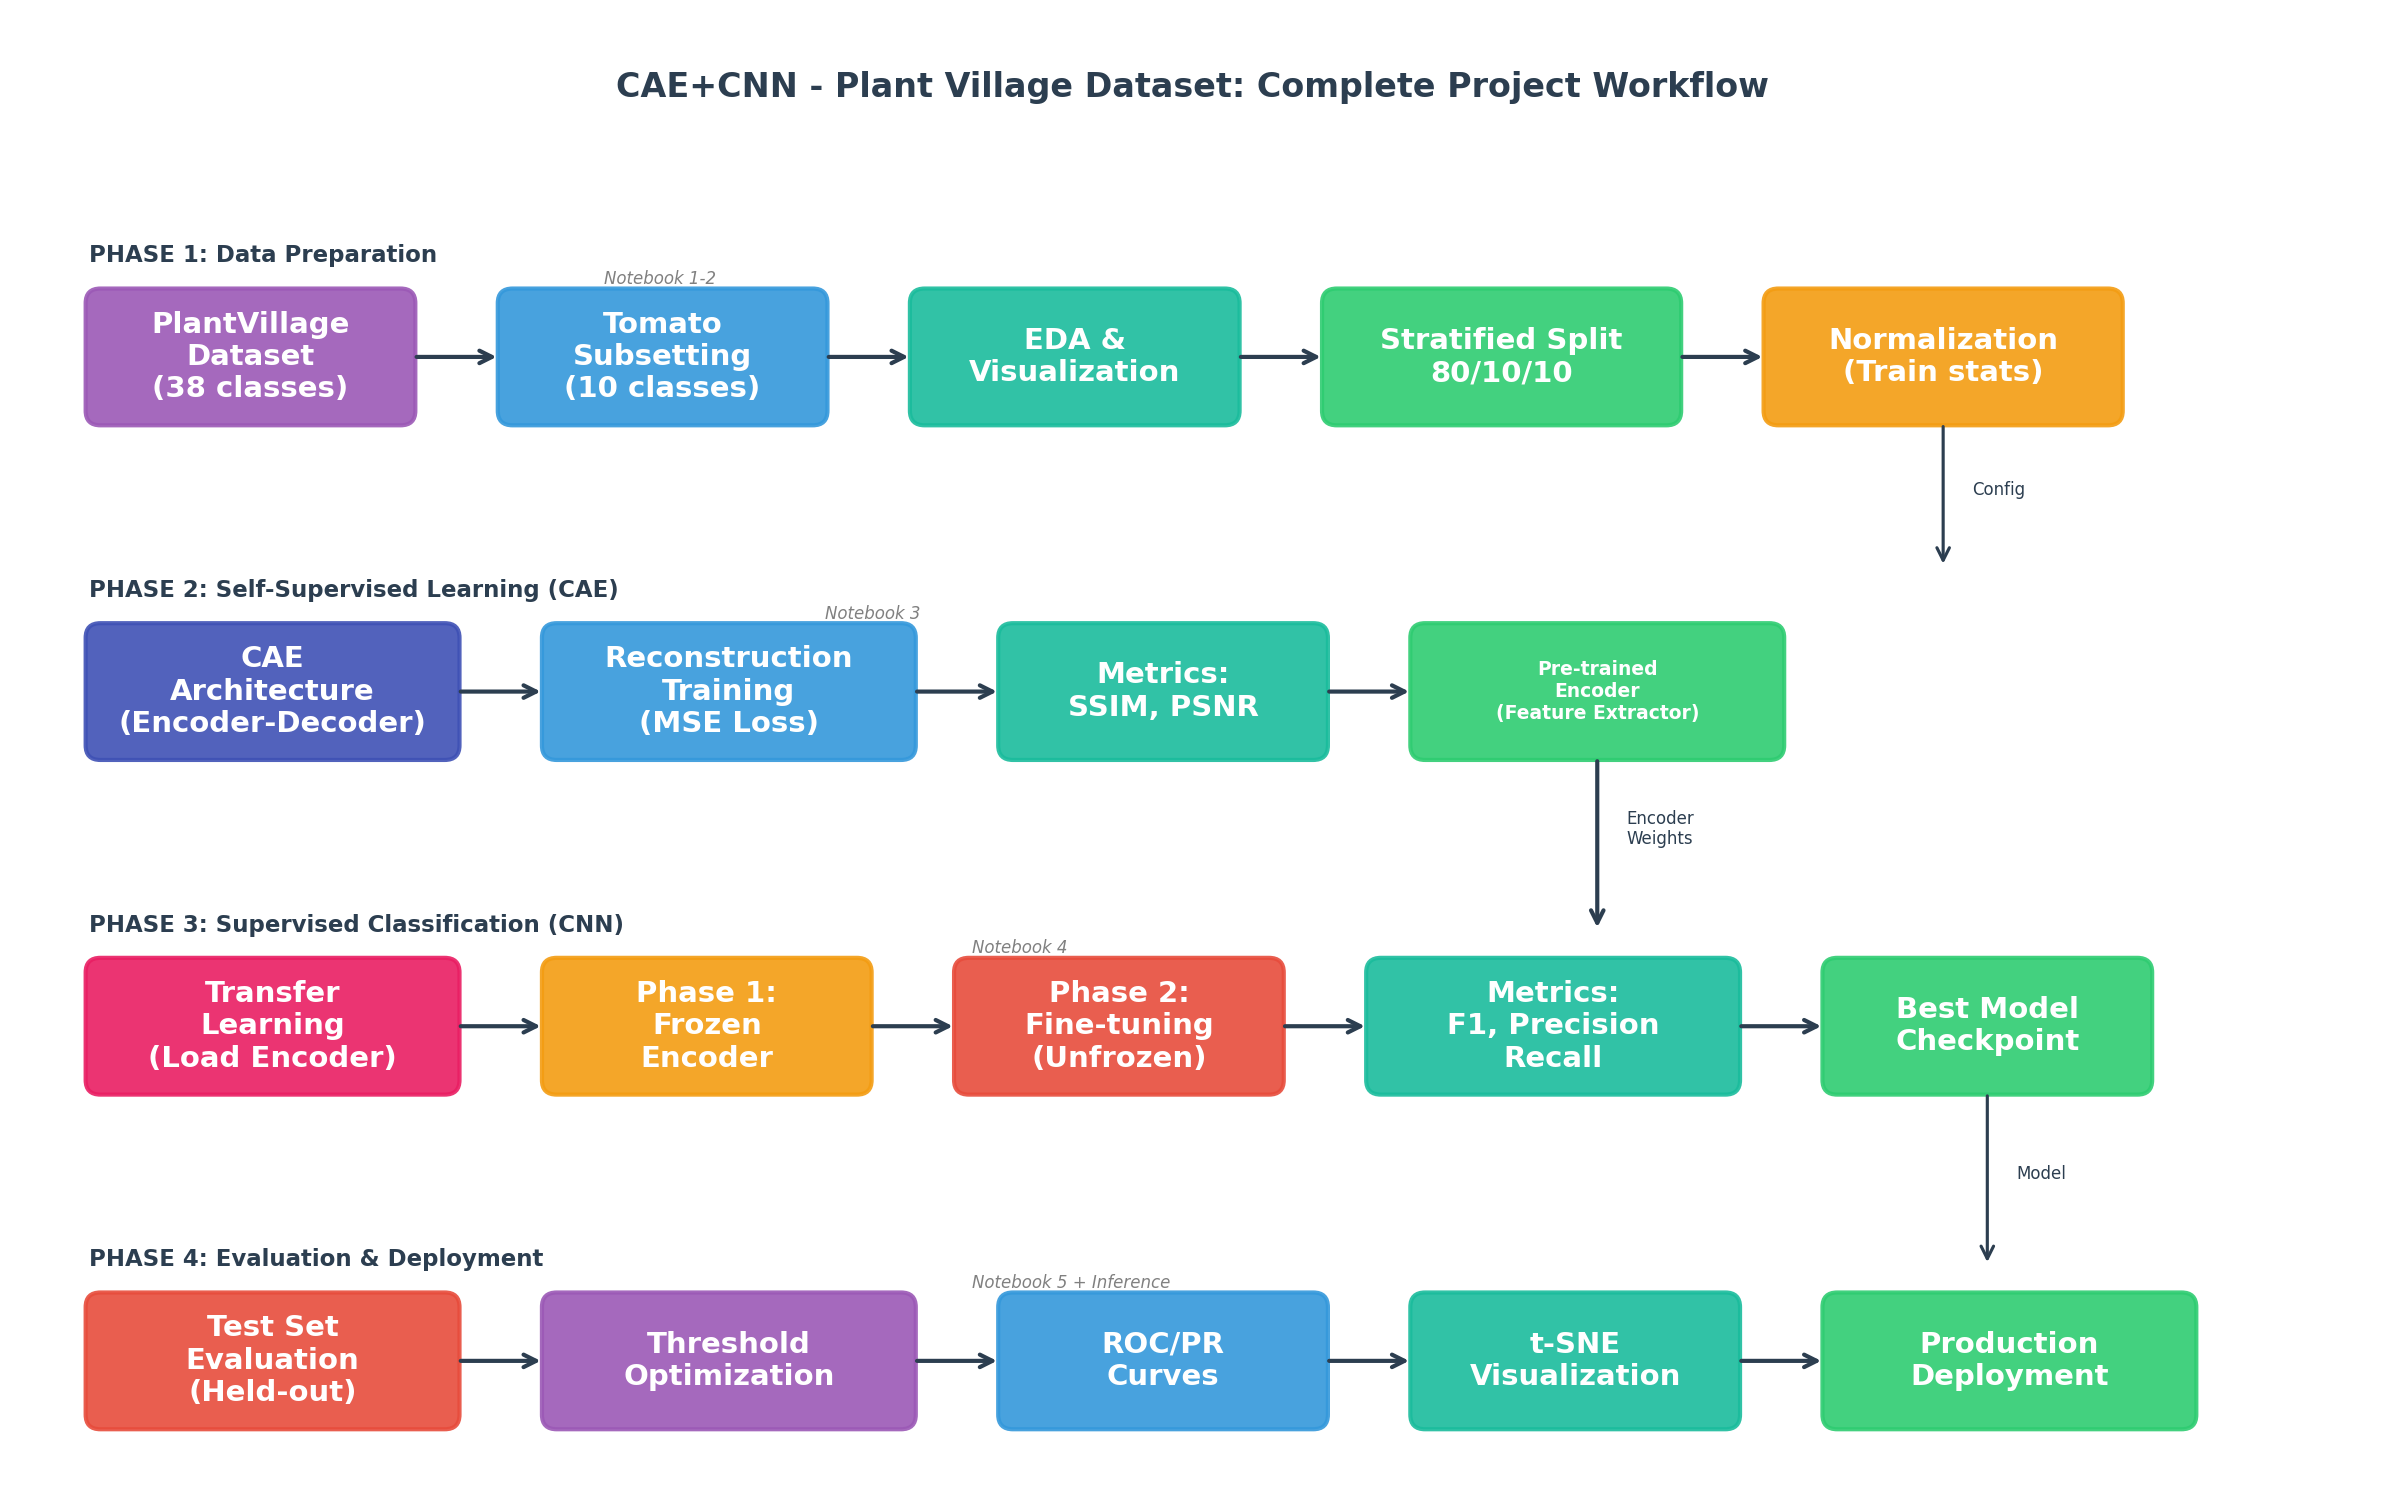

In [3]:
# =============================================================================
# DIAGRAM 1: COMPLETE PROJECT WORKFLOW
# =============================================================================

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_xlim(0, 16)
ax.set_ylim(0, 10)
ax.axis('off')

# Title
ax.text(8, 9.5, 'CAE+CNN - Plant Village Dataset: Complete Project Workflow', 
        ha='center', va='center', fontsize=16, fontweight='bold', color=COLORS['dark'])

# ===== ROW 1: Data Preparation =====
ax.text(0.5, 8.3, 'PHASE 1: Data Preparation', fontsize=11, fontweight='bold', color=COLORS['dark'])

draw_box(ax, 0.5, 7.2, 2.2, 0.9, 'PlantVillage\nDataset\n(38 classes)', COLORS['purple'])
draw_arrow(ax, (2.7, 7.65), (3.3, 7.65), COLORS['dark'])

draw_box(ax, 3.3, 7.2, 2.2, 0.9, 'Tomato\nSubsetting\n(10 classes)', COLORS['primary'])
draw_arrow(ax, (5.5, 7.65), (6.1, 7.65), COLORS['dark'])

draw_box(ax, 6.1, 7.2, 2.2, 0.9, 'EDA &\nVisualization', COLORS['teal'])
draw_arrow(ax, (8.3, 7.65), (8.9, 7.65), COLORS['dark'])

draw_box(ax, 8.9, 7.2, 2.4, 0.9, 'Stratified Split\n80/10/10', COLORS['secondary'])
draw_arrow(ax, (11.3, 7.65), (11.9, 7.65), COLORS['dark'])

draw_box(ax, 11.9, 7.2, 2.4, 0.9, 'Normalization\n(Train stats)', COLORS['warning'])

# ===== ROW 2: Self-Supervised Learning =====
ax.text(0.5, 6.0, 'PHASE 2: Self-Supervised Learning (CAE)', fontsize=11, fontweight='bold', color=COLORS['dark'])

draw_box(ax, 0.5, 4.9, 2.5, 0.9, 'CAE\nArchitecture\n(Encoder-Decoder)', COLORS['indigo'])
draw_arrow(ax, (3.0, 5.35), (3.6, 5.35), COLORS['dark'])

draw_box(ax, 3.6, 4.9, 2.5, 0.9, 'Reconstruction\nTraining\n(MSE Loss)', COLORS['primary'])
draw_arrow(ax, (6.1, 5.35), (6.7, 5.35), COLORS['dark'])

draw_box(ax, 6.7, 4.9, 2.2, 0.9, 'Metrics:\nSSIM, PSNR', COLORS['teal'])
draw_arrow(ax, (8.9, 5.35), (9.5, 5.35), COLORS['dark'])

draw_box(ax, 9.5, 4.9, 2.5, 0.9, 'Pre-trained\nEncoder\n(Feature Extractor)', COLORS['secondary'], fontsize=9)

# ===== ROW 3: Supervised Learning =====
ax.text(0.5, 3.7, 'PHASE 3: Supervised Classification (CNN)', fontsize=11, fontweight='bold', color=COLORS['dark'])

draw_box(ax, 0.5, 2.6, 2.5, 0.9, 'Transfer\nLearning\n(Load Encoder)', COLORS['pink'])
draw_arrow(ax, (3.0, 3.05), (3.6, 3.05), COLORS['dark'])

draw_box(ax, 3.6, 2.6, 2.2, 0.9, 'Phase 1:\nFrozen\nEncoder', COLORS['warning'])
draw_arrow(ax, (5.8, 3.05), (6.4, 3.05), COLORS['dark'])

draw_box(ax, 6.4, 2.6, 2.2, 0.9, 'Phase 2:\nFine-tuning\n(Unfrozen)', COLORS['accent'])
draw_arrow(ax, (8.6, 3.05), (9.2, 3.05), COLORS['dark'])

draw_box(ax, 9.2, 2.6, 2.5, 0.9, 'Metrics:\nF1, Precision\nRecall', COLORS['teal'])
draw_arrow(ax, (11.7, 3.05), (12.3, 3.05), COLORS['dark'])

draw_box(ax, 12.3, 2.6, 2.2, 0.9, 'Best Model\nCheckpoint', COLORS['secondary'])

# ===== ROW 4: Evaluation & Deployment =====
ax.text(0.5, 1.4, 'PHASE 4: Evaluation & Deployment', fontsize=11, fontweight='bold', color=COLORS['dark'])

draw_box(ax, 0.5, 0.3, 2.5, 0.9, 'Test Set\nEvaluation\n(Held-out)', COLORS['accent'])
draw_arrow(ax, (3.0, 0.75), (3.6, 0.75), COLORS['dark'])

draw_box(ax, 3.6, 0.3, 2.5, 0.9, 'Threshold\nOptimization', COLORS['purple'])
draw_arrow(ax, (6.1, 0.75), (6.7, 0.75), COLORS['dark'])

draw_box(ax, 6.7, 0.3, 2.2, 0.9, 'ROC/PR\nCurves', COLORS['primary'])
draw_arrow(ax, (8.9, 0.75), (9.5, 0.75), COLORS['dark'])

draw_box(ax, 9.5, 0.3, 2.2, 0.9, 't-SNE\nVisualization', COLORS['teal'])
draw_arrow(ax, (11.7, 0.75), (12.3, 0.75), COLORS['dark'])

draw_box(ax, 12.3, 0.3, 2.5, 0.9, 'Production\nDeployment', COLORS['secondary'])

# Vertical connections between phases
draw_arrow(ax, (13.1, 7.2), (13.1, 6.2), COLORS['dark'], style='->', linewidth=1.5)
ax.text(13.3, 6.7, 'Config', fontsize=8, color=COLORS['dark'])

draw_arrow(ax, (10.75, 4.9), (10.75, 3.7), COLORS['dark'], style='->', linewidth=2)
ax.text(10.95, 4.3, 'Encoder\nWeights', fontsize=8, color=COLORS['dark'])

draw_arrow(ax, (13.4, 2.6), (13.4, 1.4), COLORS['dark'], style='->', linewidth=1.5)
ax.text(13.6, 2.0, 'Model', fontsize=8, color=COLORS['dark'])

# Add notebook labels
ax.text(4.0, 8.15, 'Notebook 1-2', fontsize=8, style='italic', color='gray')
ax.text(5.5, 5.85, 'Notebook 3', fontsize=8, style='italic', color='gray')
ax.text(6.5, 3.55, 'Notebook 4', fontsize=8, style='italic', color='gray')
ax.text(6.5, 1.25, 'Notebook 5 + Inference', fontsize=8, style='italic', color='gray')

plt.tight_layout()

# Save
fig_path = OUTPUT_PATH / 'diagram_01_project_workflow.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Figure saved: {fig_path}")

plt.show()

---

## 2. Data Pipeline Diagram

✓ Figure saved: /home/maliciit/ml-projects/python-projects/plant-village-cae/outputs/diagram_02_data_pipeline.png


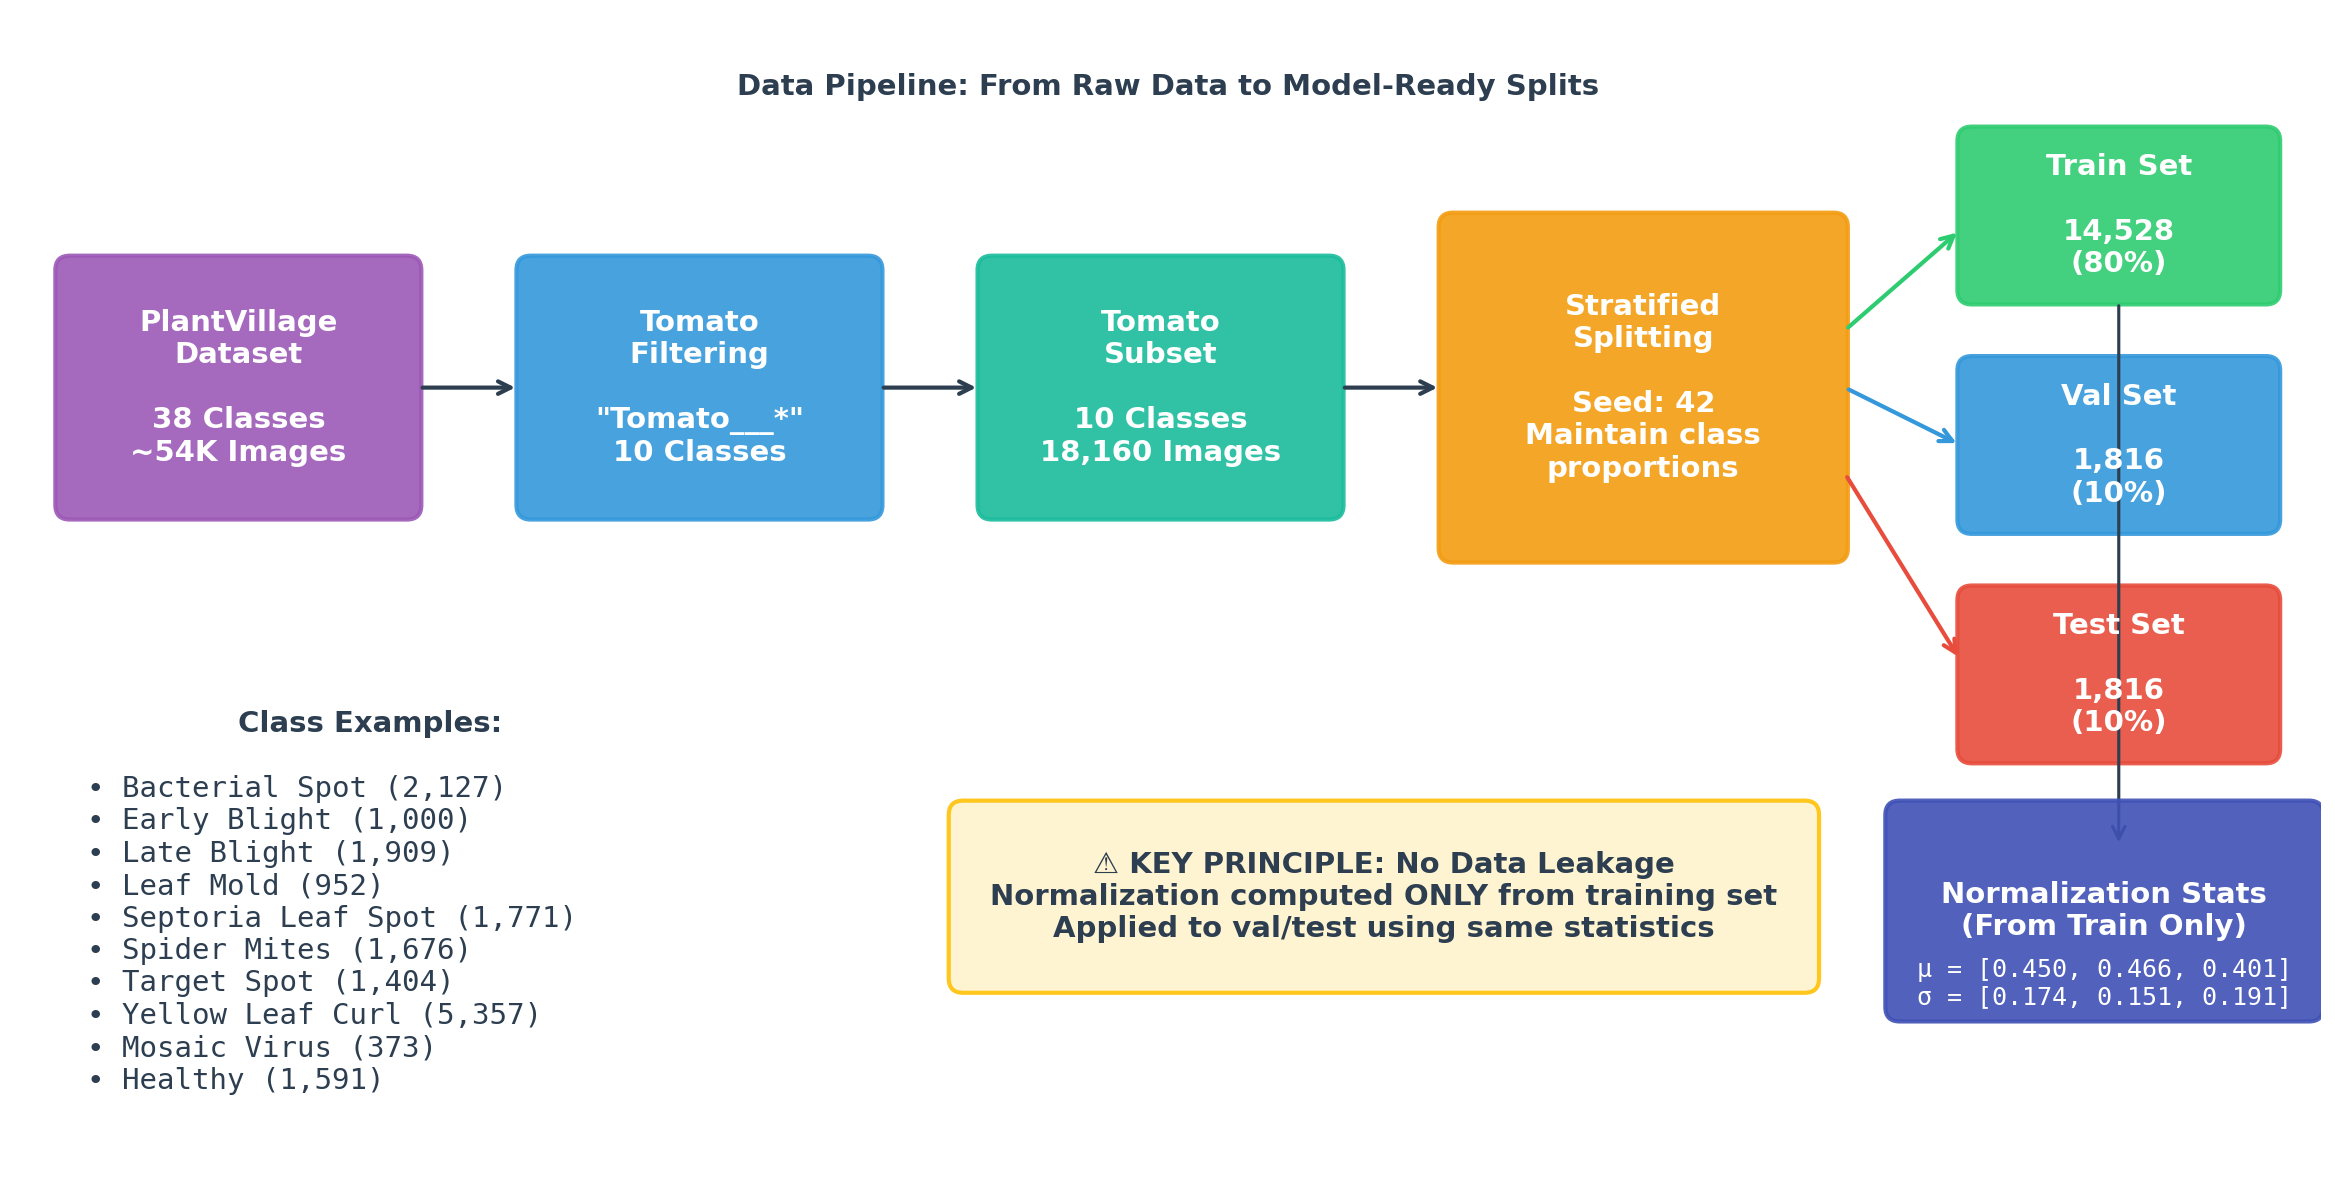

In [4]:
# =============================================================================
# DIAGRAM 2: DATA PIPELINE
# =============================================================================

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(0, 16)
ax.set_ylim(0, 8)
ax.axis('off')

# Title
ax.text(8, 7.5, 'Data Pipeline: From Raw Data to Model-Ready Splits', 
        ha='center', va='center', fontsize=14, fontweight='bold', color=COLORS['dark'])

# ===== Source Data =====
draw_box(ax, 0.3, 4.5, 2.5, 1.8, 'PlantVillage\nDataset\n\n38 Classes\n~54K Images', 
         COLORS['purple'], fontsize=14)

draw_arrow(ax, (2.8, 5.4), (3.5, 5.4), COLORS['dark'], linewidth=2)

# ===== Filtering =====
draw_box(ax, 3.5, 4.5, 2.5, 1.8, 'Tomato\nFiltering\n\n"Tomato___*"\n10 Classes', 
         COLORS['primary'], fontsize=14)

draw_arrow(ax, (6.0, 5.4), (6.7, 5.4), COLORS['dark'], linewidth=2)

# ===== Tomato Dataset =====
draw_box(ax, 6.7, 4.5, 2.5, 1.8, 'Tomato\nSubset\n\n10 Classes\n18,160 Images', 
         COLORS['teal'], fontsize=14)

draw_arrow(ax, (9.2, 5.4), (9.9, 5.4), COLORS['dark'], linewidth=2)

# ===== Stratified Split =====
draw_box(ax, 9.9, 4.2, 2.8, 2.4, 'Stratified\nSplitting\n\nSeed: 42\nMaintain class\nproportions', 
         COLORS['warning'], fontsize=14)

# ===== Three output splits =====
# Train
draw_arrow(ax, (12.7, 5.8), (13.5, 6.5), COLORS['secondary'], linewidth=2)
draw_box(ax, 13.5, 6.0, 2.2, 1.2, 'Train Set\n\n14,528\n(80%)', 
         COLORS['secondary'], fontsize=14)

# Validation
draw_arrow(ax, (12.7, 5.4), (13.5, 5.0), COLORS['primary'], linewidth=2)
draw_box(ax, 13.5, 4.4, 2.2, 1.2, 'Val Set\n\n1,816\n(10%)', 
         COLORS['primary'], fontsize=14)

# Test
draw_arrow(ax, (12.7, 4.8), (13.5, 3.5), COLORS['accent'], linewidth=2)
draw_box(ax, 13.5, 2.8, 2.2, 1.2, 'Test Set\n\n1,816\n(10%)', 
         COLORS['accent'], fontsize=14)

# ===== Normalization Stats =====
draw_arrow(ax, (14.6, 6.0), (14.6, 2.2), COLORS['dark'], style='->', linewidth=1.5)

draw_box(ax, 13.0, 1.0, 3.0, 1.5, 'Normalization Stats\n(From Train Only)', 
         COLORS['indigo'], fontsize=14)

# ===== Add class distribution info =====
ax.text(1.55, 3.0, 'Class Examples:', fontsize=14, fontweight='bold', color=COLORS['dark'])
classes_text = '''• Bacterial Spot (2,127)
• Early Blight (1,000)
• Late Blight (1,909)
• Leaf Mold (952)
• Septoria Leaf Spot (1,771)
• Spider Mites (1,676)
• Target Spot (1,404)
• Yellow Leaf Curl (5,357)
• Mosaic Virus (373)
• Healthy (1,591)'''
ax.text(0.5, 2.7, classes_text, fontsize=14, color=COLORS['dark'], 
        verticalalignment='top', family='monospace')

# Add normalization values
norm_text = '''μ = [0.450, 0.466, 0.401]
σ = [0.174, 0.151, 0.191]'''
ax.text(13.2, 1.1, norm_text, fontsize=12, color='white', 
        family='monospace')

# Key principle box
draw_box(ax, 6.5, 1.2, 6.0, 1.3, 
         '⚠️ KEY PRINCIPLE: No Data Leakage\n'
         'Normalization computed ONLY from training set\n'
         'Applied to val/test using same statistics', 
         '#fff3cd', text_color=COLORS['dark'], fontsize=14, edgecolor='#ffc107')

plt.tight_layout()

# Save
fig_path = OUTPUT_PATH / 'diagram_02_data_pipeline.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Figure saved: {fig_path}")

plt.show()

---

## 3. CAE Architecture Diagram

✓ Figure saved: /home/maliciit/ml-projects/python-projects/plant-village-cae/outputs/diagram_03_cae_architecture.png


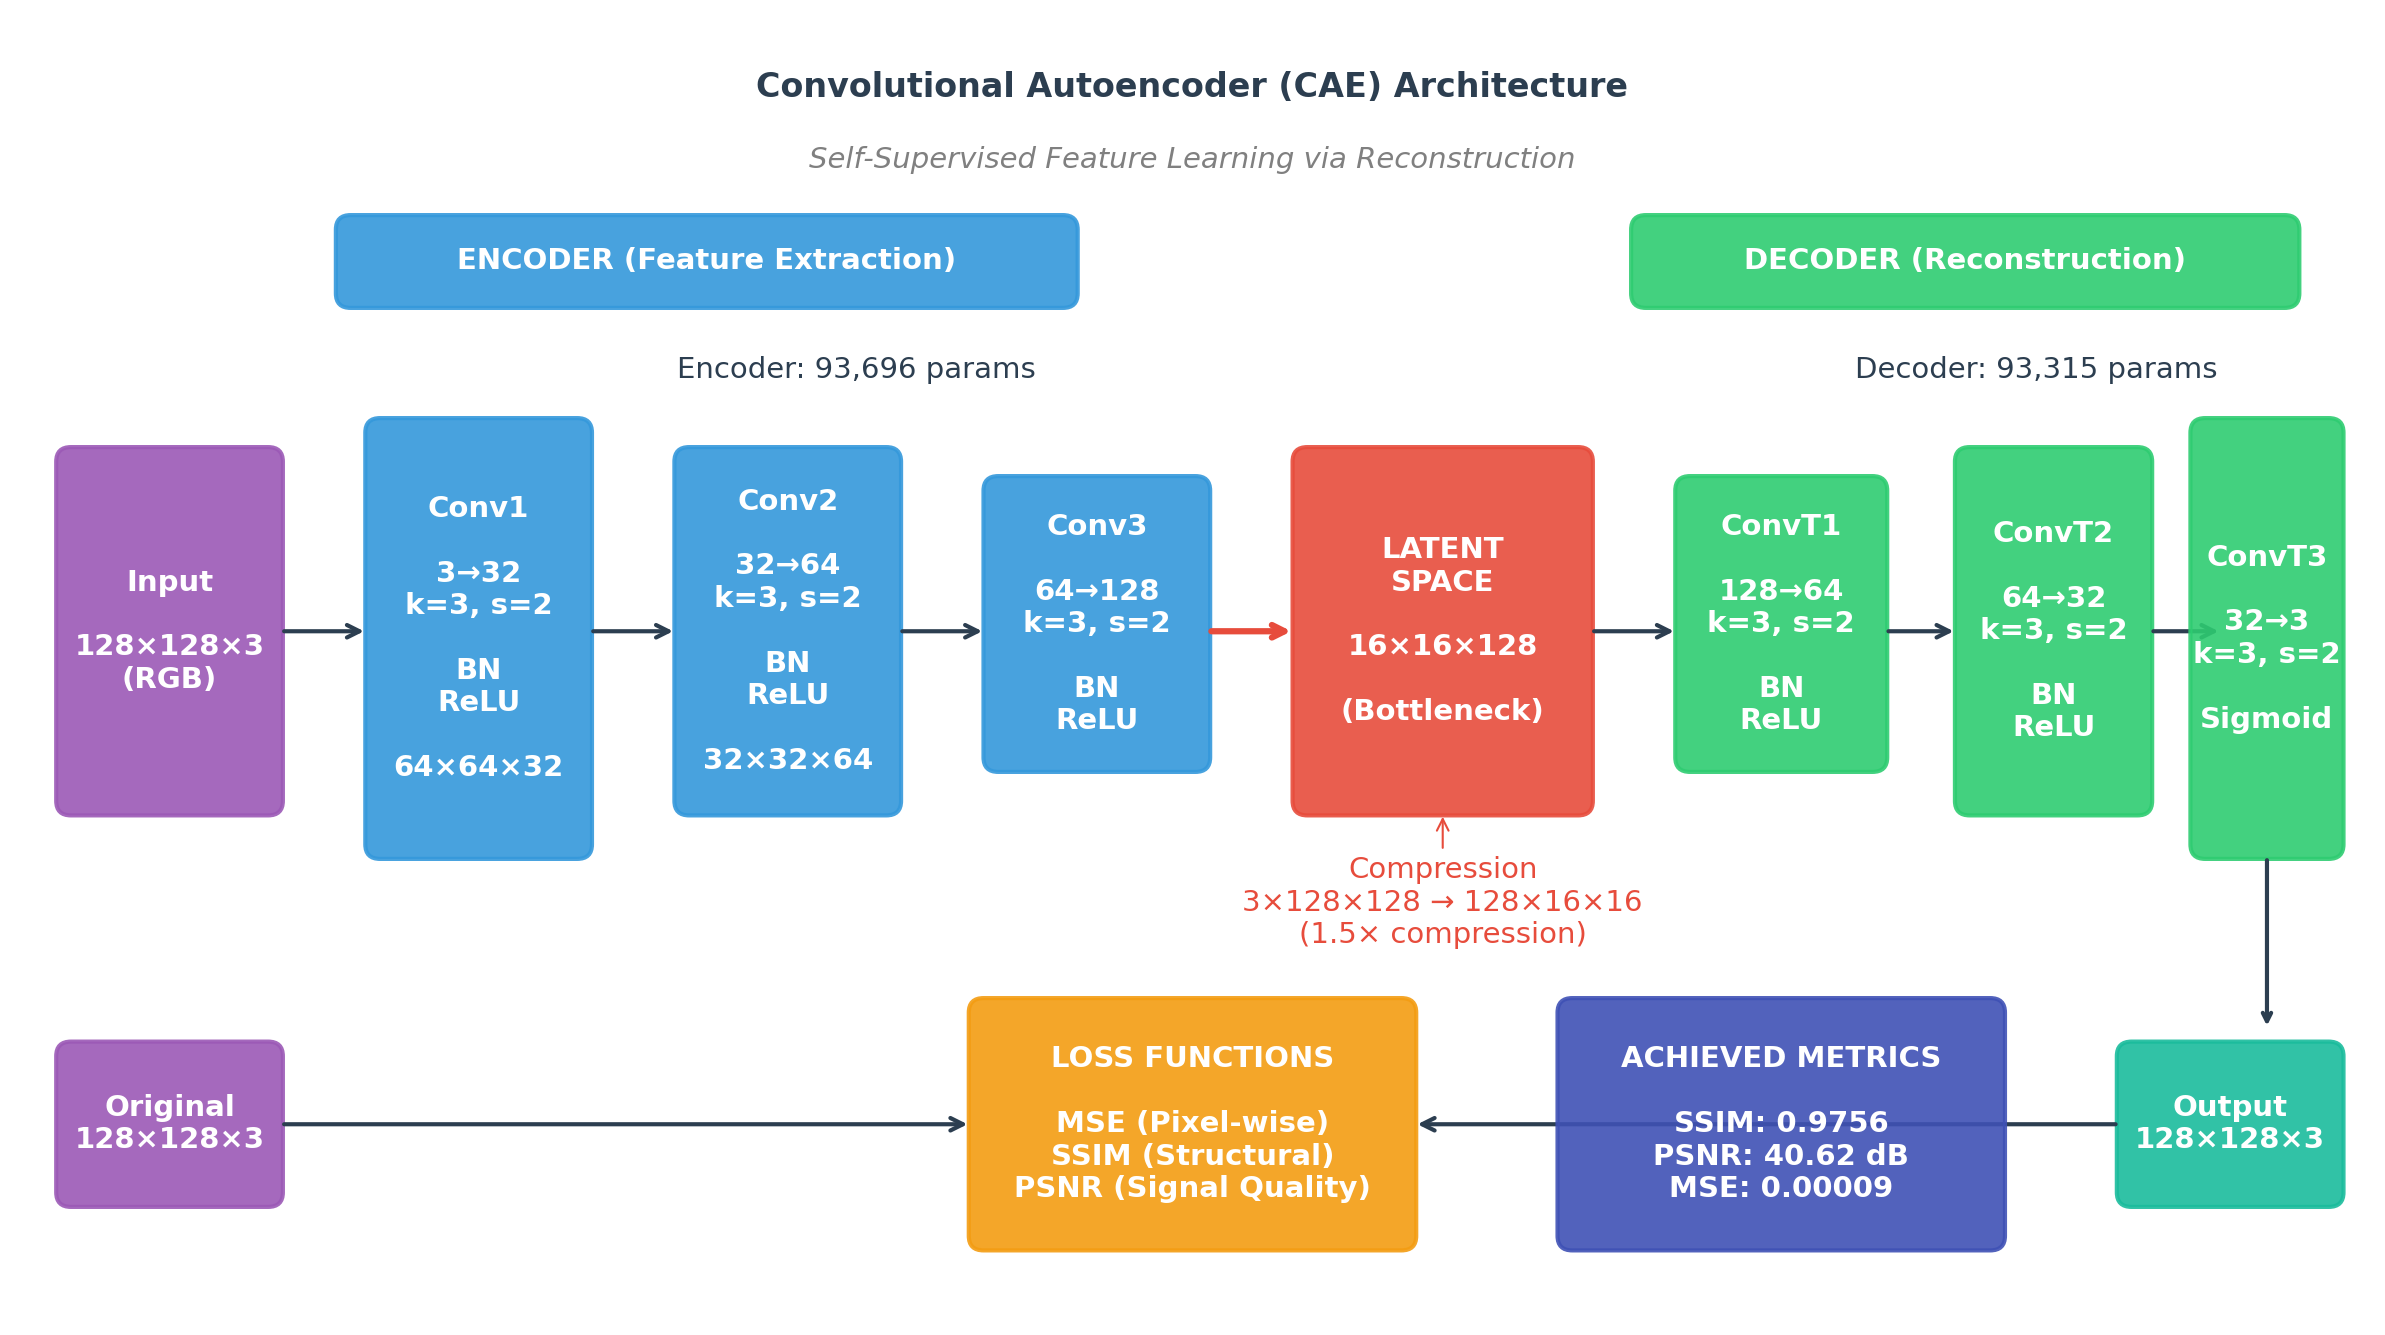

In [5]:
# =============================================================================
# DIAGRAM 3: CAE ARCHITECTURE
# =============================================================================

fig, ax = plt.subplots(figsize=(16, 9))
ax.set_xlim(0, 16)
ax.set_ylim(0, 9)
ax.axis('off')

# Title
ax.text(8, 8.5, 'Convolutional Autoencoder (CAE) Architecture', 
        ha='center', va='center', fontsize=16, fontweight='bold', color=COLORS['dark'])
ax.text(8, 8.0, 'Self-Supervised Feature Learning via Reconstruction', 
        ha='center', va='center', fontsize=14, style='italic', color='gray')

# ===== Input Image =====
draw_box(ax, 0.3, 3.5, 1.5, 2.5, 'Input\n\n128×128×3\n(RGB)', 
         COLORS['purple'], fontsize=14)

# ===== ENCODER =====
# Encoder label
draw_box(ax, 2.2, 7.0, 5.0, 0.6, 'ENCODER (Feature Extraction)', 
         COLORS['primary'], fontsize=14)

# Conv Block 1
draw_arrow(ax, (1.8, 4.75), (2.4, 4.75), COLORS['dark'])
draw_box(ax, 2.4, 3.2, 1.5, 3.0, 'Conv1\n\n3→32\nk=3, s=2\n\nBN\nReLU\n\n64×64×32', 
         COLORS['primary'], fontsize=14)

# Conv Block 2
draw_arrow(ax, (3.9, 4.75), (4.5, 4.75), COLORS['dark'])
draw_box(ax, 4.5, 3.5, 1.5, 2.5, 'Conv2\n\n32→64\nk=3, s=2\n\nBN\nReLU\n\n32×32×64', 
         COLORS['primary'], fontsize=14)

# Conv Block 3
draw_arrow(ax, (6.0, 4.75), (6.6, 4.75), COLORS['dark'])
draw_box(ax, 6.6, 3.8, 1.5, 2.0, 'Conv3\n\n64→128\nk=3, s=2\n\nBN\nReLU', 
         COLORS['primary'], fontsize=14)

# ===== BOTTLENECK =====
draw_arrow(ax, (8.1, 4.75), (8.7, 4.75), COLORS['accent'], linewidth=3)
draw_box(ax, 8.7, 3.5, 2.0, 2.5, 'LATENT\nSPACE\n\n16×16×128\n\n(Bottleneck)', 
         COLORS['accent'], fontsize=14)

# ===== DECODER =====
# Decoder label
draw_box(ax, 11.0, 7.0, 4.5, 0.6, 'DECODER (Reconstruction)', 
         COLORS['secondary'], fontsize=14)

# ConvT Block 1
draw_arrow(ax, (10.7, 4.75), (11.3, 4.75), COLORS['dark'])
draw_box(ax, 11.3, 3.8, 1.4, 2.0, 'ConvT1\n\n128→64\nk=3, s=2\n\nBN\nReLU', 
         COLORS['secondary'], fontsize=14)

# ConvT Block 2
draw_arrow(ax, (12.7, 4.75), (13.2, 4.75), COLORS['dark'])
draw_box(ax, 13.2, 3.5, 1.3, 2.5, 'ConvT2\n\n64→32\nk=3, s=2\n\nBN\nReLU', 
         COLORS['secondary'], fontsize=14)

# ConvT Block 3
draw_arrow(ax, (14.5, 4.75), (15.0, 4.75), COLORS['dark'])
draw_box(ax, 14.8, 3.2, 1.0, 3.0, 'ConvT3\n\n32→3\nk=3, s=2\n\nSigmoid', 
         COLORS['secondary'], fontsize=14)

# ===== Output =====
# Output arrow going down and around
ax.annotate('', xy=(15.3, 2.0), xytext=(15.3, 3.2),
            arrowprops=dict(arrowstyle='->', color=COLORS['dark'], lw=2))

draw_box(ax, 14.3, 0.8, 1.5, 1.1, 'Output\n128×128×3', 
         COLORS['teal'], fontsize=14)

# ===== Loss Calculation =====
draw_box(ax, 0.3, 0.8, 1.5, 1.1, 'Original\n128×128×3', 
         COLORS['purple'], fontsize=14)

# Arrows to loss
draw_arrow(ax, (1.8, 1.35), (6.5, 1.35), COLORS['dark'])
draw_arrow(ax, (14.3, 1.35), (9.5, 1.35), COLORS['dark'])

draw_box(ax, 6.5, 0.5, 3.0, 1.7, 'LOSS FUNCTIONS\n\nMSE (Pixel-wise)\nSSIM (Structural)\nPSNR (Signal Quality)', 
         COLORS['warning'], fontsize=14)

# ===== Metrics box =====
draw_box(ax, 10.5, 0.5, 3.0, 1.7, 'ACHIEVED METRICS\n\nSSIM: 0.9756\nPSNR: 40.62 dB\nMSE: 0.00009', 
         COLORS['indigo'], fontsize=14)

# ===== Annotations =====
# Compression ratio
ax.annotate('Compression\n3×128×128 → 128×16×16\n(1.5× compression)', 
            xy=(9.7, 3.5), xytext=(9.7, 2.6),
            fontsize=14, ha='center', color=COLORS['accent'],
            arrowprops=dict(arrowstyle='->', color=COLORS['accent'], lw=1))

# Parameter counts
ax.text(4.5, 6.5, 'Encoder: 93,696 params', fontsize=14, color=COLORS['dark'])
ax.text(12.5, 6.5, 'Decoder: 93,315 params', fontsize=14, color=COLORS['dark'])

plt.tight_layout()

# Save
fig_path = OUTPUT_PATH / 'diagram_03_cae_architecture.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Figure saved: {fig_path}")

plt.show()

---

## 4. CNN Classifier Architecture (Two-Phase Training)

/tmp/ipykernel_22570/4270458913.py:99: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22570/4270458913.py:99: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22570/4270458913.py:99: UserWarning: Glyph 128275 (\N{OPEN LOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22570/4270458913.py:103: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) DejaVu Sans.
  plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
/tmp/ipykernel_22570/4270458913.py:103: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
/tmp/ipykernel_22570/4270458913.py:103: UserWarning: Glyph 128275 (\N{OPEN LOCK}) missing from font(s) DejaVu Sans.
  plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')


✓ Figure saved: /home/maliciit/ml-projects/python-projects/plant-village-cae/outputs/diagram_04_cnn_two_phase_training.png


/home/maliciit/ml-projects/ml-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/maliciit/ml-projects/ml-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/maliciit/ml-projects/ml-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128275 (\N{OPEN LOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


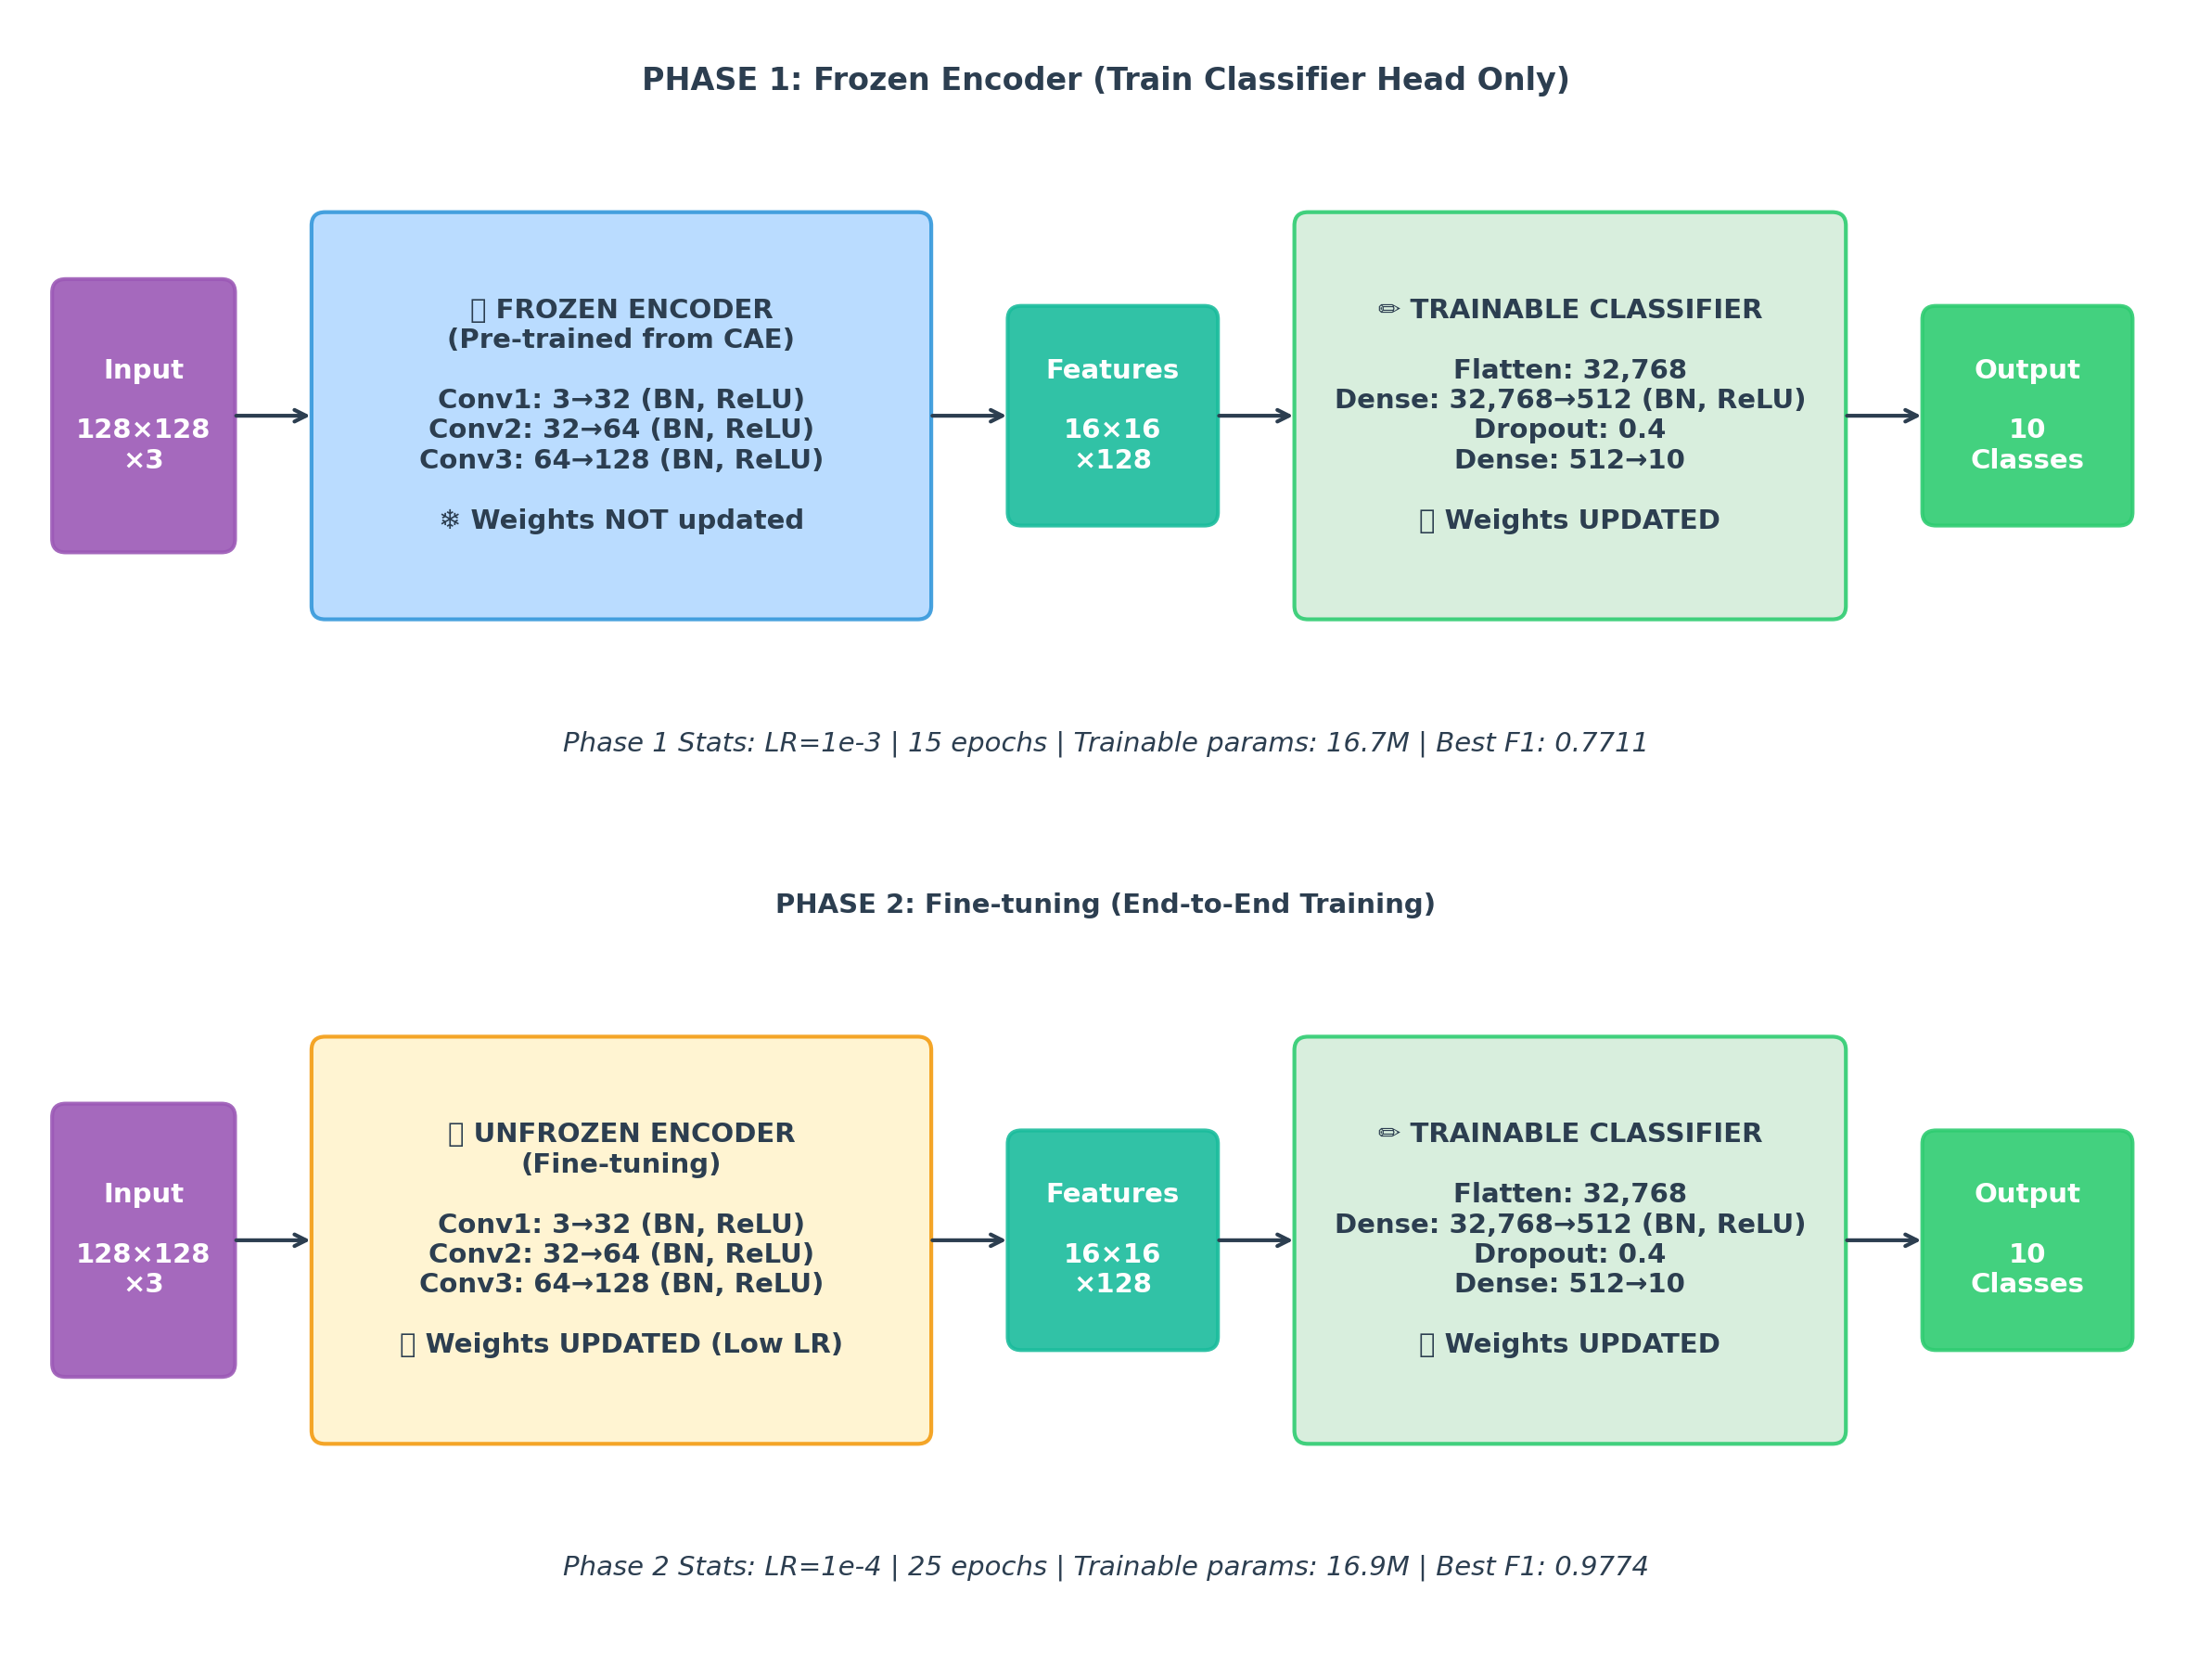

In [6]:
# =============================================================================
# DIAGRAM 4: CNN CLASSIFIER - TWO PHASE TRAINING
# =============================================================================

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# ===== PHASE 1: FROZEN ENCODER =====
ax1 = axes[0]
ax1.set_xlim(0, 16)
ax1.set_ylim(0, 6)
ax1.axis('off')

# Title
ax1.text(8, 5.5, 'PHASE 1: Frozen Encoder (Train Classifier Head Only)', 
        ha='center', va='center', fontsize=16, fontweight='bold', color=COLORS['dark'])

# Input
draw_box(ax1, 0.3, 2.0, 1.3, 2.0, 'Input\n\n128×128\n×3', COLORS['purple'], fontsize=14)

# Frozen Encoder (with ice/lock symbol)
draw_arrow(ax1, (1.6, 3.0), (2.2, 3.0), COLORS['dark'])
draw_box(ax1, 2.2, 1.5, 4.5, 3.0, 
         '🔒 FROZEN ENCODER\n(Pre-trained from CAE)\n\n'
         'Conv1: 3→32 (BN, ReLU)\n'
         'Conv2: 32→64 (BN, ReLU)\n'
         'Conv3: 64→128 (BN, ReLU)\n\n'
         '❄️ Weights NOT updated', 
         '#b3d9ff', text_color=COLORS['dark'], fontsize=14, edgecolor=COLORS['primary'])

# Feature output
draw_arrow(ax1, (6.7, 3.0), (7.3, 3.0), COLORS['dark'])
draw_box(ax1, 7.3, 2.2, 1.5, 1.6, 'Features\n\n16×16\n×128', COLORS['teal'], fontsize=14)

# Classifier Head
draw_arrow(ax1, (8.8, 3.0), (9.4, 3.0), COLORS['dark'])
draw_box(ax1, 9.4, 1.5, 4.0, 3.0, 
         '✏️ TRAINABLE CLASSIFIER\n\n'
         'Flatten: 32,768\n'
         'Dense: 32,768→512 (BN, ReLU)\n'
         'Dropout: 0.4\n'
         'Dense: 512→10\n\n'
         '✅ Weights UPDATED', 
         '#d4edda', text_color=COLORS['dark'], fontsize=14, edgecolor=COLORS['secondary'])

# Output
draw_arrow(ax1, (13.4, 3.0), (14.0, 3.0), COLORS['dark'])
draw_box(ax1, 14.0, 2.2, 1.5, 1.6, 'Output\n\n10\nClasses', COLORS['secondary'], fontsize=14)

# Phase 1 stats
ax1.text(8, 0.5, 'Phase 1 Stats: LR=1e-3 | 15 epochs | Trainable params: 16.7M | Best F1: 0.7711', 
        ha='center', fontsize=14, color=COLORS['dark'], style='italic')

# ===== PHASE 2: UNFROZEN ENCODER =====
ax2 = axes[1]
ax2.set_xlim(0, 16)
ax2.set_ylim(0, 6)
ax2.axis('off')

# Title
ax2.text(8, 5.5, 'PHASE 2: Fine-tuning (End-to-End Training)', 
        ha='center', va='center', fontsize=14, fontweight='bold', color=COLORS['dark'])

# Input
draw_box(ax2, 0.3, 2.0, 1.3, 2.0, 'Input\n\n128×128\n×3', COLORS['purple'], fontsize=14)

# Unfrozen Encoder
draw_arrow(ax2, (1.6, 3.0), (2.2, 3.0), COLORS['dark'])
draw_box(ax2, 2.2, 1.5, 4.5, 3.0, 
         '🔓 UNFROZEN ENCODER\n(Fine-tuning)\n\n'
         'Conv1: 3→32 (BN, ReLU)\n'
         'Conv2: 32→64 (BN, ReLU)\n'
         'Conv3: 64→128 (BN, ReLU)\n\n'
         '✅ Weights UPDATED (Low LR)', 
         '#fff3cd', text_color=COLORS['dark'], fontsize=14, edgecolor=COLORS['warning'])

# Feature output
draw_arrow(ax2, (6.7, 3.0), (7.3, 3.0), COLORS['dark'])
draw_box(ax2, 7.3, 2.2, 1.5, 1.6, 'Features\n\n16×16\n×128', COLORS['teal'], fontsize=14)

# Classifier Head
draw_arrow(ax2, (8.8, 3.0), (9.4, 3.0), COLORS['dark'])
draw_box(ax2, 9.4, 1.5, 4.0, 3.0, 
         '✏️ TRAINABLE CLASSIFIER\n\n'
         'Flatten: 32,768\n'
         'Dense: 32,768→512 (BN, ReLU)\n'
         'Dropout: 0.4\n'
         'Dense: 512→10\n\n'
         '✅ Weights UPDATED', 
         '#d4edda', text_color=COLORS['dark'], fontsize=14, edgecolor=COLORS['secondary'])

# Output
draw_arrow(ax2, (13.4, 3.0), (14.0, 3.0), COLORS['dark'])
draw_box(ax2, 14.0, 2.2, 1.5, 1.6, 'Output\n\n10\nClasses', COLORS['secondary'], fontsize=14)

# Phase 2 stats
ax2.text(8, 0.5, 'Phase 2 Stats: LR=1e-4 | 25 epochs | Trainable params: 16.9M | Best F1: 0.9774', 
        ha='center', fontsize=14, color=COLORS['dark'], style='italic')

plt.tight_layout()

# Save
fig_path = OUTPUT_PATH / 'diagram_04_cnn_two_phase_training.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Figure saved: {fig_path}")

plt.show()

---

## 5. Training Pipeline Diagram

✓ Figure saved: /home/maliciit/ml-projects/python-projects/plant-village-cae/outputs/diagram_05_training_pipeline.png


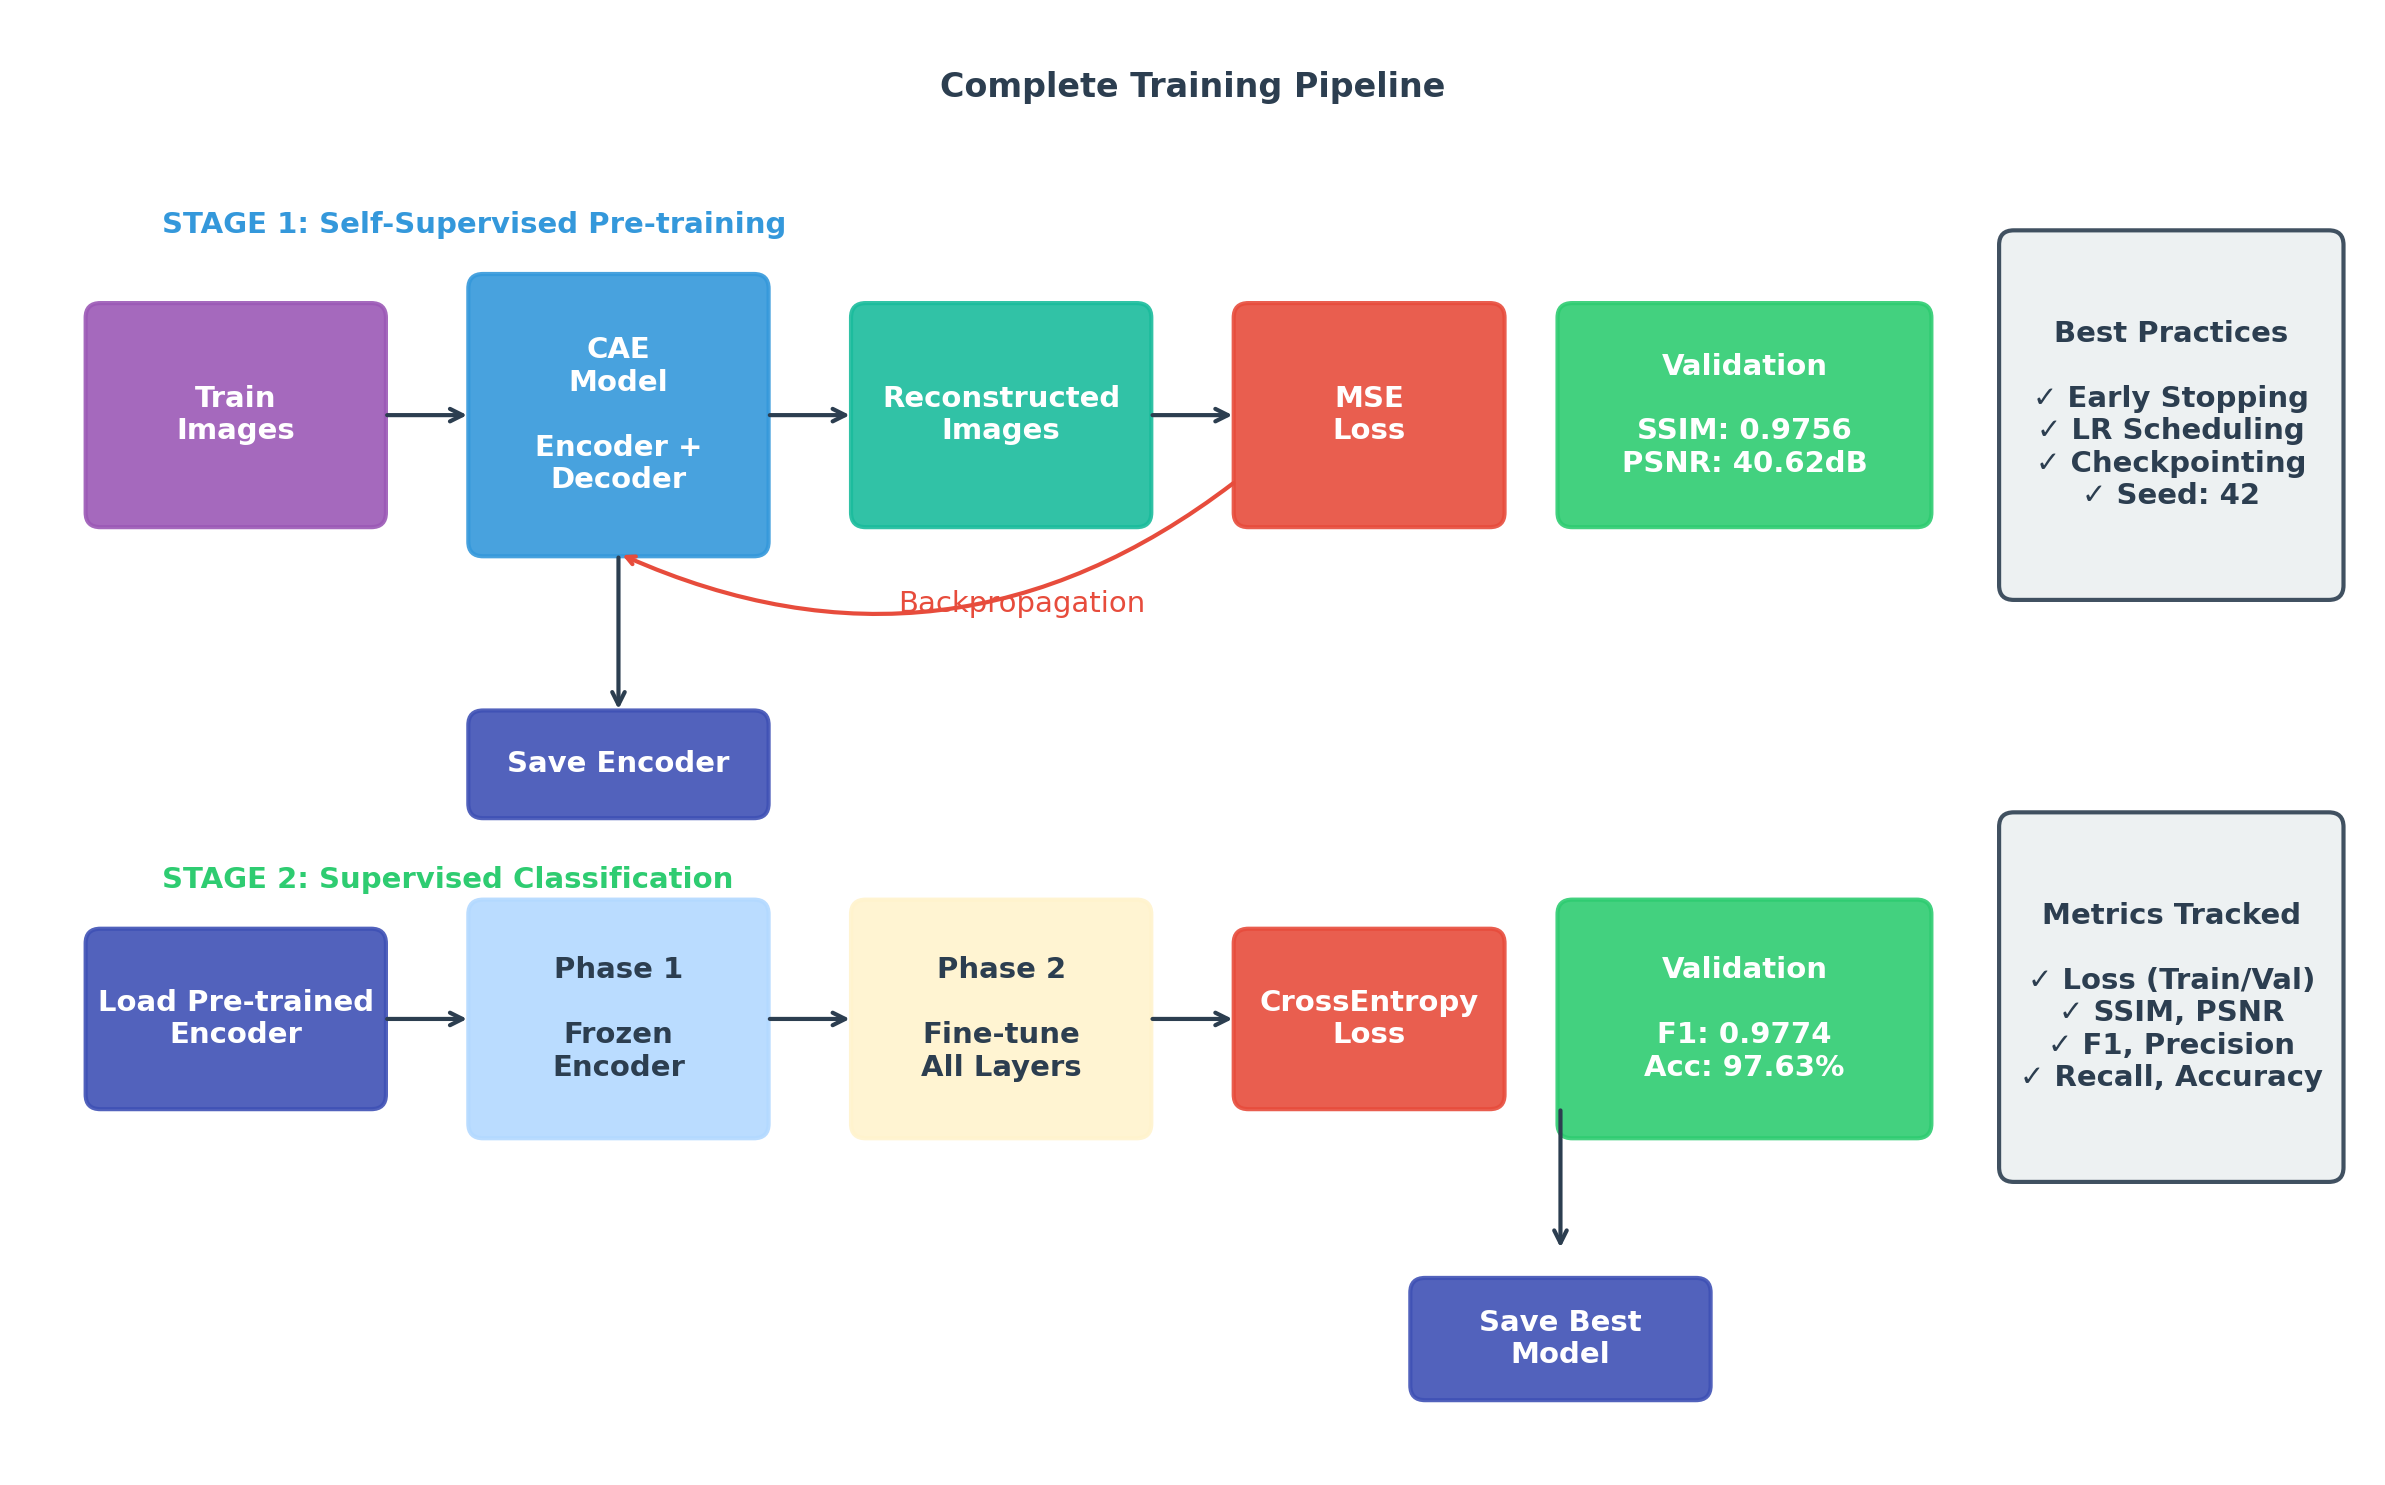

In [7]:
# =============================================================================
# DIAGRAM 5: COMPLETE TRAINING PIPELINE
# =============================================================================

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_xlim(0, 16)
ax.set_ylim(0, 10)
ax.axis('off')

# Title
ax.text(8, 9.5, 'Complete Training Pipeline', 
        ha='center', va='center', fontsize=16, fontweight='bold', color=COLORS['dark'])

# ===== STAGE 1: CAE Pre-training =====
ax.text(1, 8.5, 'STAGE 1: Self-Supervised Pre-training', fontsize=14, fontweight='bold', color=COLORS['primary'])

# CAE Training loop
draw_box(ax, 0.5, 6.5, 2.0, 1.5, 'Train\nImages', COLORS['purple'], fontsize=14)
draw_arrow(ax, (2.5, 7.25), (3.1, 7.25), COLORS['dark'])

draw_box(ax, 3.1, 6.3, 2.0, 1.9, 'CAE\nModel\n\nEncoder +\nDecoder', COLORS['primary'], fontsize=14)
draw_arrow(ax, (5.1, 7.25), (5.7, 7.25), COLORS['dark'])

draw_box(ax, 5.7, 6.5, 2.0, 1.5, 'Reconstructed\nImages', COLORS['teal'], fontsize=14)
draw_arrow(ax, (7.7, 7.25), (8.3, 7.25), COLORS['dark'])

draw_box(ax, 8.3, 6.5, 1.8, 1.5, 'MSE\nLoss', COLORS['accent'], fontsize=14)

# Backprop arrow
ax.annotate('', xy=(4.1, 6.3), xytext=(8.3, 6.8),
            arrowprops=dict(arrowstyle='->', color=COLORS['accent'], lw=2,
                          connectionstyle='arc3,rad=-0.3'))
ax.text(6.0, 5.9, 'Backpropagation', fontsize=14, color=COLORS['accent'])

# Validation metrics
draw_box(ax, 10.5, 6.5, 2.5, 1.5, 'Validation\n\nSSIM: 0.9756\nPSNR: 40.62dB', COLORS['secondary'], fontsize=14)

# Save encoder
draw_arrow(ax, (4.1, 6.3), (4.1, 5.2), COLORS['dark'])
draw_box(ax, 3.1, 4.5, 2.0, 0.7, 'Save Encoder', COLORS['indigo'], fontsize=14)

# ===== STAGE 2: Classifier Training =====
ax.text(1, 4.0, 'STAGE 2: Supervised Classification', fontsize=14, fontweight='bold', color=COLORS['secondary'])

# Phase 1
draw_box(ax, 0.5, 2.5, 2.0, 1.2, 'Load Pre-trained\nEncoder', COLORS['indigo'], fontsize=14)
draw_arrow(ax, (2.5, 3.1), (3.1, 3.1), COLORS['dark'])

draw_box(ax, 3.1, 2.3, 2.0, 1.6, 'Phase 1\n\nFrozen\nEncoder', '#b3d9ff', text_color=COLORS['dark'], fontsize=14)
draw_arrow(ax, (5.1, 3.1), (5.7, 3.1), COLORS['dark'])

draw_box(ax, 5.7, 2.3, 2.0, 1.6, 'Phase 2\n\nFine-tune\nAll Layers', '#fff3cd', text_color=COLORS['dark'], fontsize=14)
draw_arrow(ax, (7.7, 3.1), (8.3, 3.1), COLORS['dark'])

draw_box(ax, 8.3, 2.5, 1.8, 1.2, 'CrossEntropy\nLoss', COLORS['accent'], fontsize=14)

# Validation metrics
draw_box(ax, 10.5, 2.3, 2.5, 1.6, 'Validation\n\nF1: 0.9774\nAcc: 97.63%', COLORS['secondary'], fontsize=14)

# Save model
draw_arrow(ax, (10.5, 2.5), (10.5, 1.5), COLORS['dark'])
draw_box(ax, 9.5, 0.5, 2.0, 0.8, 'Save Best\nModel', COLORS['indigo'], fontsize=14)

# ===== Best Practices boxes =====
draw_box(ax, 13.5, 6.0, 2.3, 2.5, 'Best Practices\n\n✓ Early Stopping\n✓ LR Scheduling\n✓ Checkpointing\n✓ Seed: 42', 
         COLORS['light'], text_color=COLORS['dark'], fontsize=14, edgecolor=COLORS['dark'])

draw_box(ax, 13.5, 2.0, 2.3, 2.5, 'Metrics Tracked\n\n✓ Loss (Train/Val)\n✓ SSIM, PSNR\n✓ F1, Precision\n✓ Recall, Accuracy', 
         COLORS['light'], text_color=COLORS['dark'], fontsize=14, edgecolor=COLORS['dark'])

plt.tight_layout()

# Save
fig_path = OUTPUT_PATH / 'diagram_05_training_pipeline.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Figure saved: {fig_path}")

plt.show()

---

## 6. Inference Pipeline Diagram

/tmp/ipykernel_22570/153652560.py:56: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22570/153652560.py:56: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22570/153652560.py:56: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22570/153652560.py:60: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
/tmp/ipykernel_22570/153652560.py:60: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
/tmp/ipykernel_22570/153652560.py:60: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')


✓ Figure saved: /home/maliciit/ml-projects/python-projects/plant-village-cae/outputs/diagram_06_inference_pipeline.png


/home/maliciit/ml-projects/ml-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/maliciit/ml-projects/ml-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


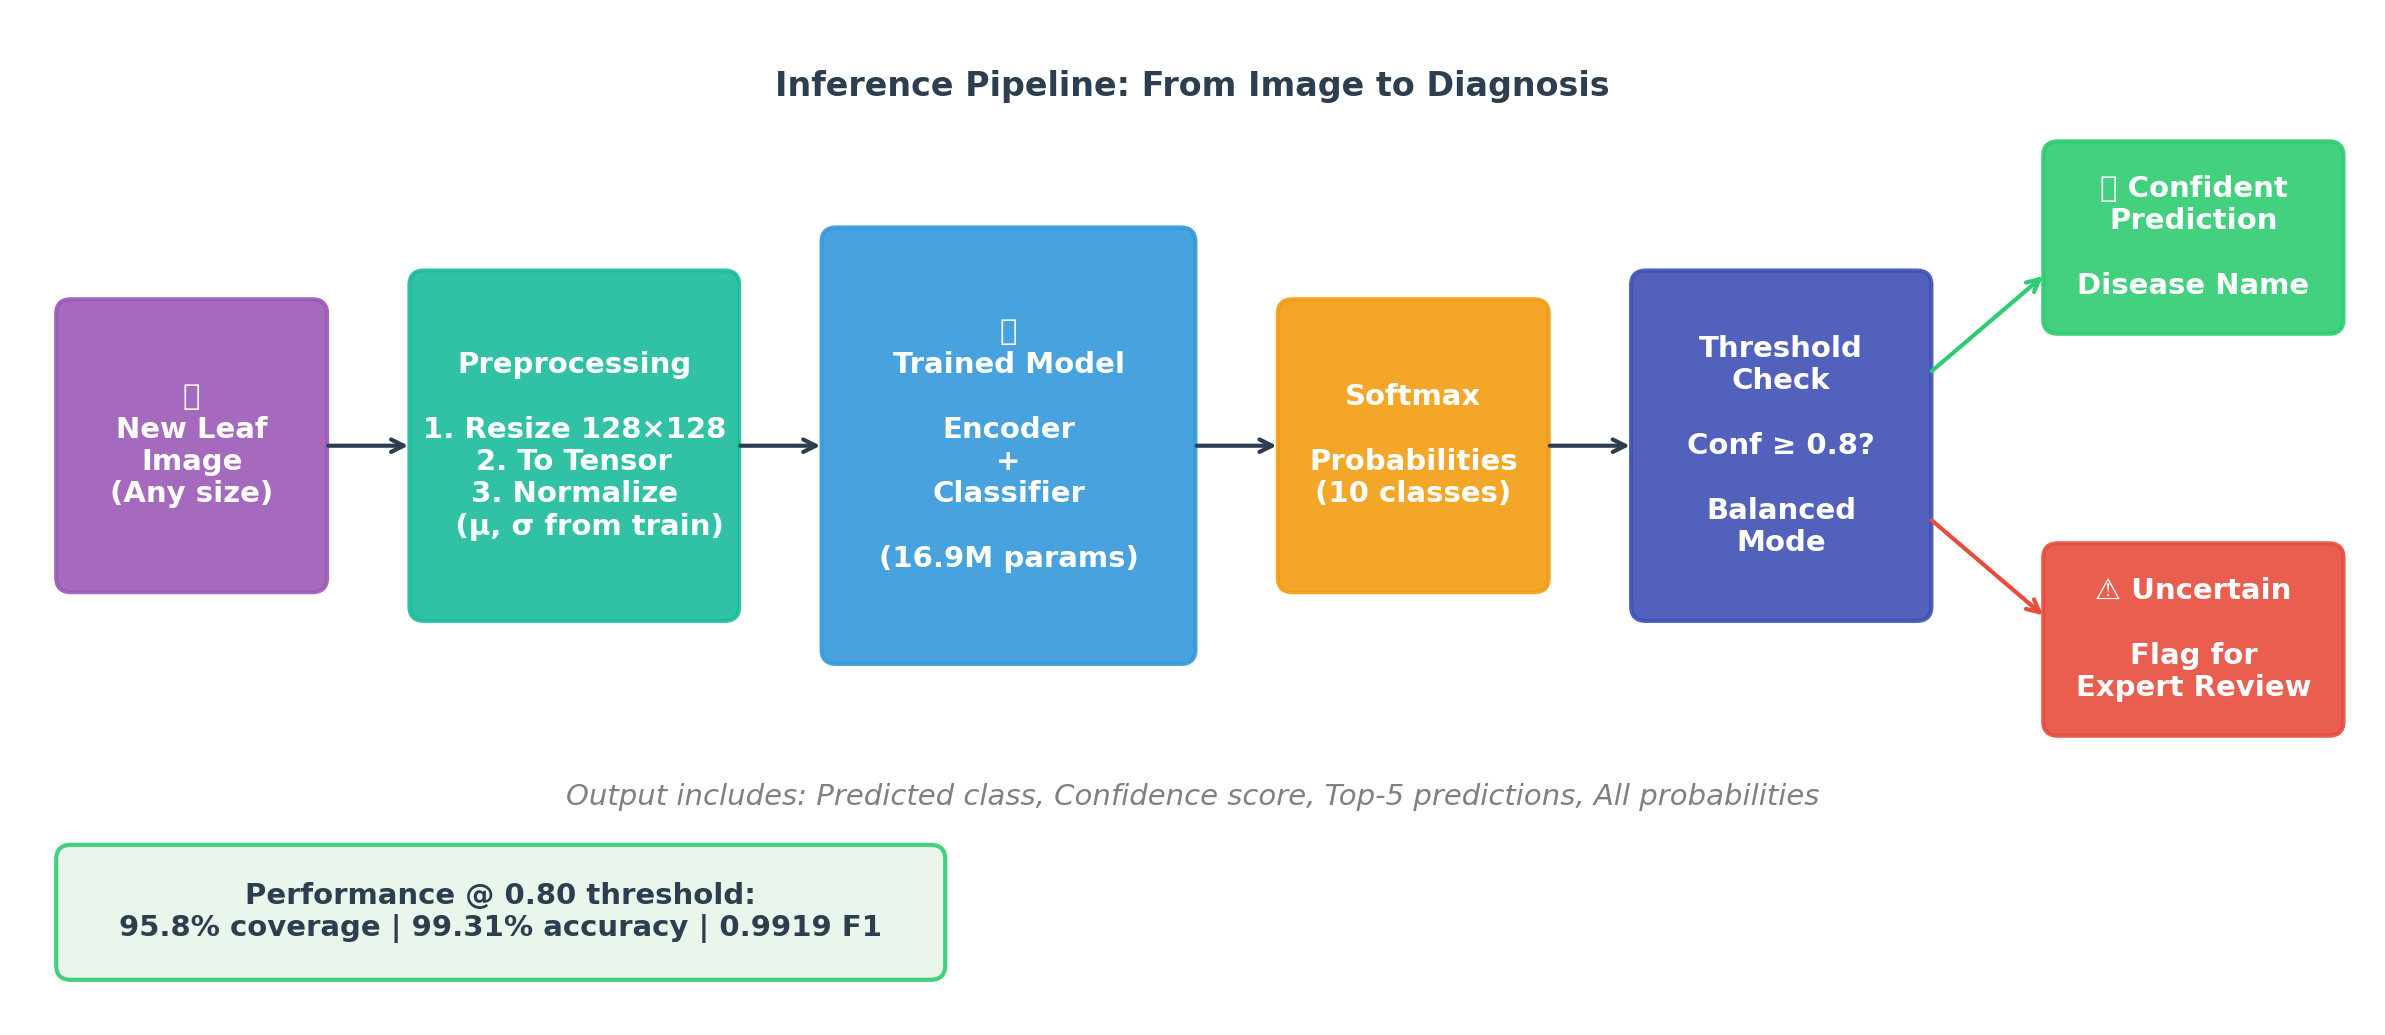

In [8]:
# =============================================================================
# DIAGRAM 6: INFERENCE PIPELINE
# =============================================================================

fig, ax = plt.subplots(figsize=(16, 7))
ax.set_xlim(0, 16)
ax.set_ylim(0, 7)
ax.axis('off')

# Title
ax.text(8, 6.5, 'Inference Pipeline: From Image to Diagnosis', 
        ha='center', va='center', fontsize=16, fontweight='bold', color=COLORS['dark'])

# ===== Input =====
draw_box(ax, 0.3, 3.0, 1.8, 2.0, '📷\nNew Leaf\nImage\n(Any size)', COLORS['purple'], fontsize=14)

# ===== Preprocessing =====
draw_arrow(ax, (2.1, 4.0), (2.7, 4.0), COLORS['dark'])
draw_box(ax, 2.7, 2.8, 2.2, 2.4, 'Preprocessing\n\n1. Resize 128×128\n2. To Tensor\n3. Normalize\n   (μ, σ from train)', 
         COLORS['teal'], fontsize=14)

# ===== Model =====
draw_arrow(ax, (4.9, 4.0), (5.5, 4.0), COLORS['dark'])
draw_box(ax, 5.5, 2.5, 2.5, 3.0, '🧠\nTrained Model\n\nEncoder\n+\nClassifier\n\n(16.9M params)', 
         COLORS['primary'], fontsize=14)

# ===== Softmax =====
draw_arrow(ax, (8.0, 4.0), (8.6, 4.0), COLORS['dark'])
draw_box(ax, 8.6, 3.0, 1.8, 2.0, 'Softmax\n\nProbabilities\n(10 classes)', COLORS['warning'], fontsize=14)

# ===== Threshold Check =====
draw_arrow(ax, (10.4, 4.0), (11.0, 4.0), COLORS['dark'])
draw_box(ax, 11.0, 2.8, 2.0, 2.4, 'Threshold\nCheck\n\nConf ≥ 0.8?\n\nBalanced\nMode', 
         COLORS['indigo'], fontsize=14)

# ===== Output branches =====
# High confidence
draw_arrow(ax, (13.0, 4.5), (13.8, 5.2), COLORS['secondary'], linewidth=2)
draw_box(ax, 13.8, 4.8, 2.0, 1.3, '✅ Confident\nPrediction\n\nDisease Name', 
         COLORS['secondary'], fontsize=14)

# Low confidence
draw_arrow(ax, (13.0, 3.5), (13.8, 2.8), COLORS['accent'], linewidth=2)
draw_box(ax, 13.8, 2.0, 2.0, 1.3, '⚠️ Uncertain\n\nFlag for\nExpert Review', 
         COLORS['accent'], fontsize=14)

# ===== Output details =====
ax.text(8, 1.5, 'Output includes: Predicted class, Confidence score, Top-5 predictions, All probabilities', 
        ha='center', fontsize=14, style='italic', color='gray')

# Performance note
draw_box(ax, 0.3, 0.3, 6.0, 0.9, 
         'Performance @ 0.80 threshold:\n95.8% coverage | 99.31% accuracy | 0.9919 F1', 
         '#e8f5e9', text_color=COLORS['dark'], fontsize=14, edgecolor=COLORS['secondary'])

plt.tight_layout()

# Save
fig_path = OUTPUT_PATH / 'diagram_06_inference_pipeline.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Figure saved: {fig_path}")

plt.show()

---

## 7. Model Performance Summary Dashboard

/tmp/ipykernel_22570/2954248208.py:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


✓ Figure saved: /home/maliciit/ml-projects/python-projects/plant-village-cae/outputs/diagram_07_performance_dashboard.png


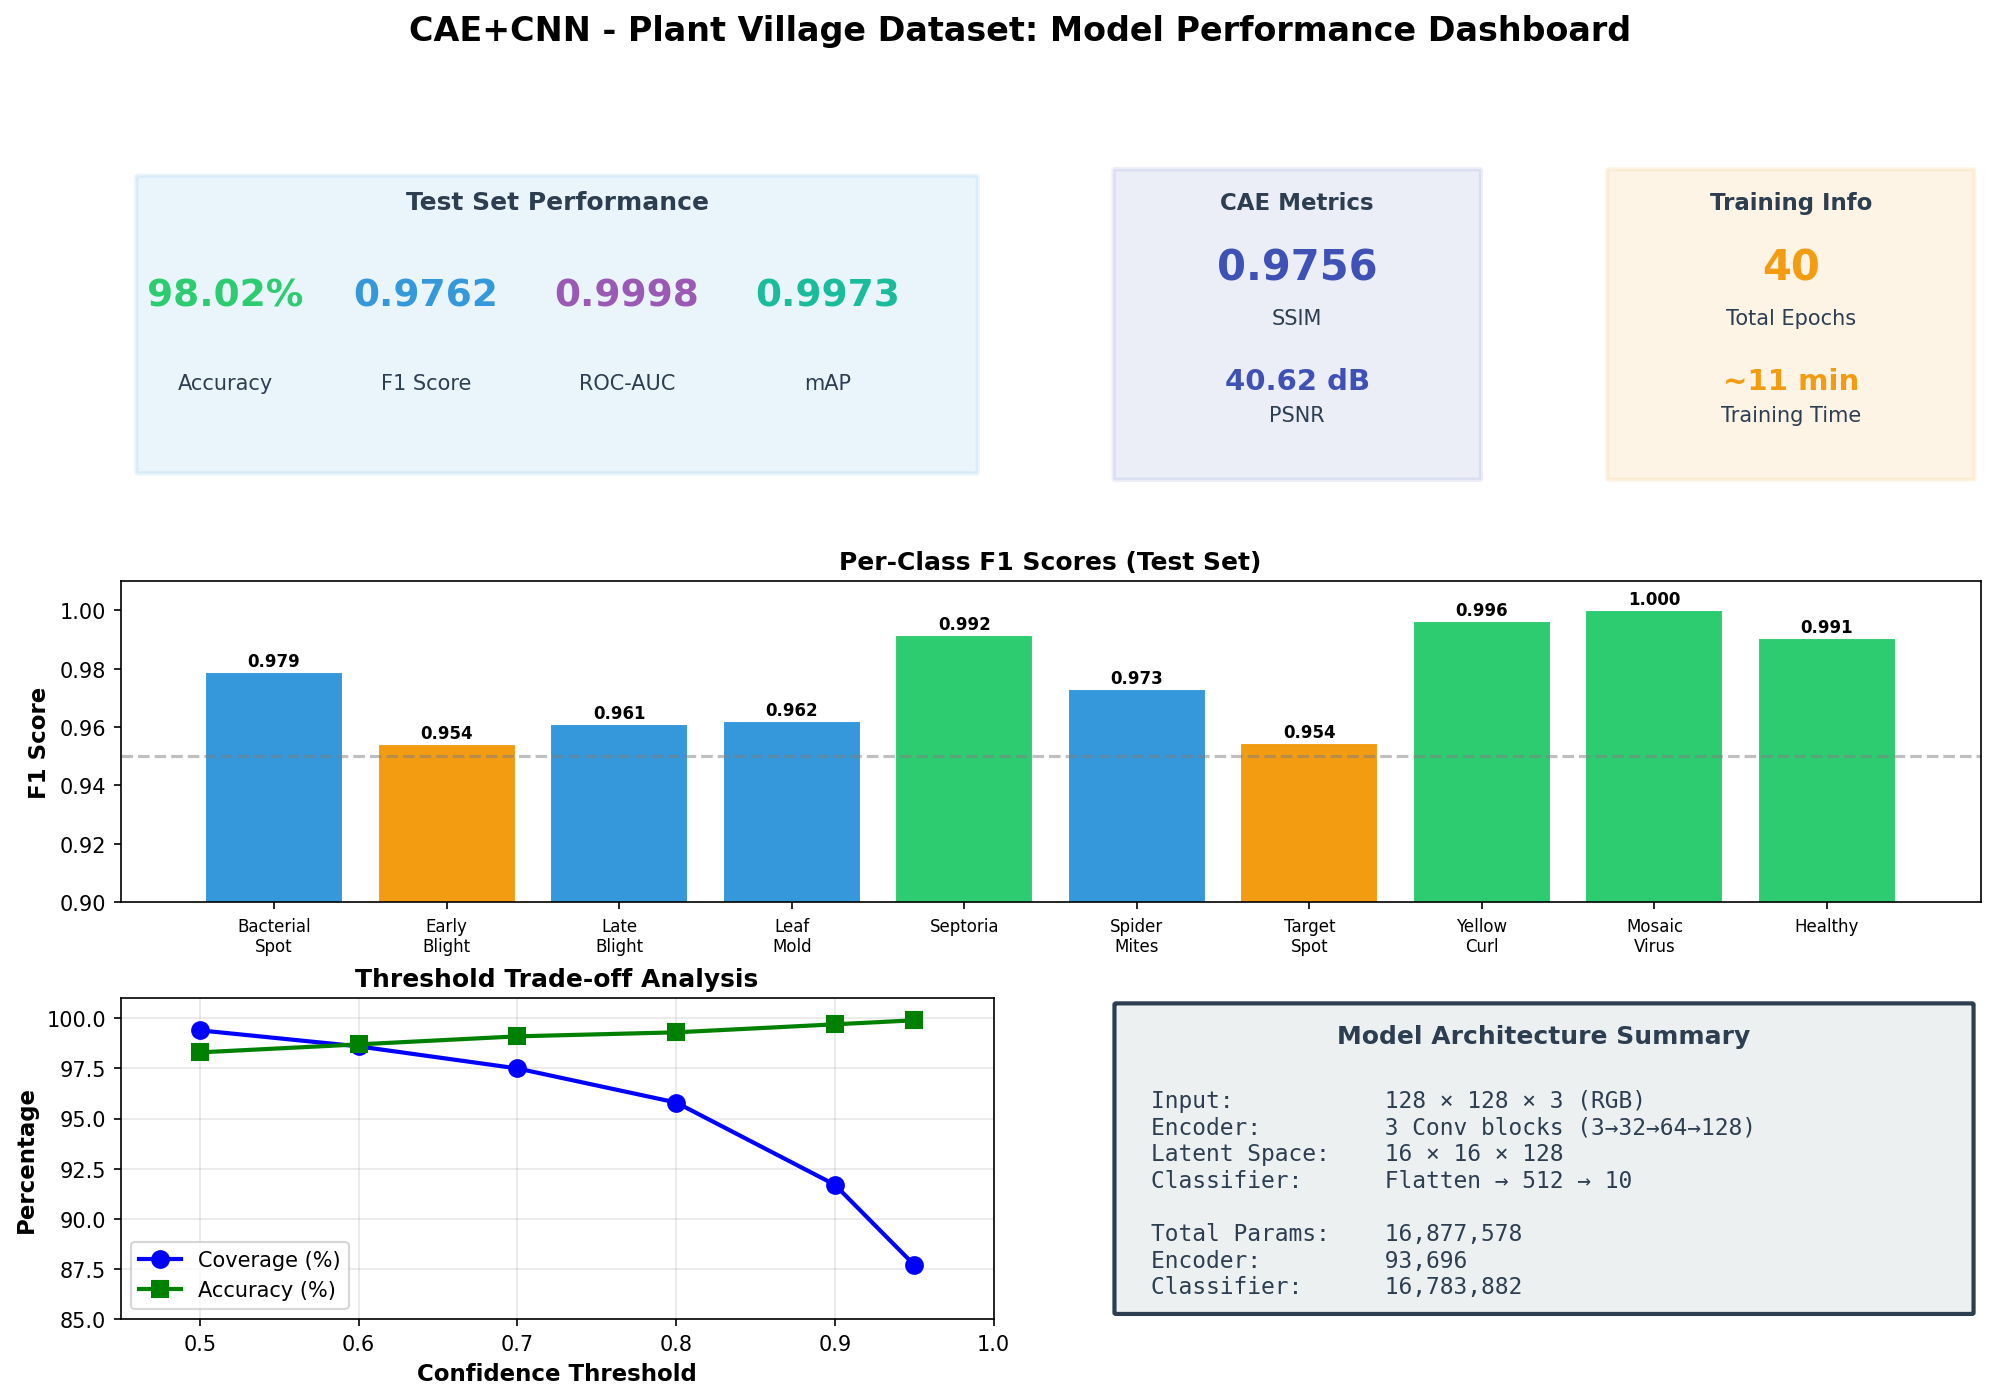

In [9]:
# =============================================================================
# DIAGRAM 7: PERFORMANCE SUMMARY DASHBOARD
# =============================================================================

fig = plt.figure(figsize=(16, 10))

# Create grid
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('CAE+CNN - Plant Village Dataset: Model Performance Dashboard', 
             fontsize=16, fontweight='bold', y=0.98)

# ===== 1. Overall Metrics (large card) =====
ax1 = fig.add_subplot(gs[0, 0:2])
ax1.axis('off')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 5)

# Background
rect = FancyBboxPatch((0.2, 0.2), 9.6, 4.6, boxstyle="round,pad=0.02",
                      facecolor=COLORS['primary'], alpha=0.1, edgecolor=COLORS['primary'], linewidth=2)
ax1.add_patch(rect)

ax1.text(5, 4.3, 'Test Set Performance', ha='center', fontsize=12, fontweight='bold', color=COLORS['dark'])

metrics = [
    ('Accuracy', '98.02%', COLORS['secondary']),
    ('F1 Score', '0.9762', COLORS['primary']),
    ('ROC-AUC', '0.9998', COLORS['purple']),
    ('mAP', '0.9973', COLORS['teal'])
]

for i, (name, value, color) in enumerate(metrics):
    x = 1.2 + i * 2.3
    ax1.text(x, 2.8, value, ha='center', fontsize=18, fontweight='bold', color=color)
    ax1.text(x, 1.5, name, ha='center', fontsize=10, color=COLORS['dark'])

# ===== 2. CAE Metrics =====
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

rect = FancyBboxPatch((0.1, 0.1), 4.8, 4.8, boxstyle="round,pad=0.02",
                      facecolor=COLORS['indigo'], alpha=0.1, edgecolor=COLORS['indigo'], linewidth=2)
ax2.add_patch(rect)

ax2.text(2.5, 4.3, 'CAE Metrics', ha='center', fontsize=11, fontweight='bold', color=COLORS['dark'])
ax2.text(2.5, 3.2, '0.9756', ha='center', fontsize=20, fontweight='bold', color=COLORS['indigo'])
ax2.text(2.5, 2.5, 'SSIM', ha='center', fontsize=10, color=COLORS['dark'])
ax2.text(2.5, 1.5, '40.62 dB', ha='center', fontsize=14, fontweight='bold', color=COLORS['indigo'])
ax2.text(2.5, 1.0, 'PSNR', ha='center', fontsize=10, color=COLORS['dark'])

# ===== 3. Training Info =====
ax3 = fig.add_subplot(gs[0, 3])
ax3.axis('off')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

rect = FancyBboxPatch((0.1, 0.1), 4.8, 4.8, boxstyle="round,pad=0.02",
                      facecolor=COLORS['warning'], alpha=0.1, edgecolor=COLORS['warning'], linewidth=2)
ax3.add_patch(rect)

ax3.text(2.5, 4.3, 'Training Info', ha='center', fontsize=11, fontweight='bold', color=COLORS['dark'])
ax3.text(2.5, 3.2, '40', ha='center', fontsize=20, fontweight='bold', color=COLORS['warning'])
ax3.text(2.5, 2.5, 'Total Epochs', ha='center', fontsize=10, color=COLORS['dark'])
ax3.text(2.5, 1.5, '~11 min', ha='center', fontsize=14, fontweight='bold', color=COLORS['warning'])
ax3.text(2.5, 1.0, 'Training Time', ha='center', fontsize=10, color=COLORS['dark'])

# ===== 4. Per-Class F1 Bar Chart =====
ax4 = fig.add_subplot(gs[1, :])

classes = ['Bacterial\nSpot', 'Early\nBlight', 'Late\nBlight', 'Leaf\nMold', 
           'Septoria', 'Spider\nMites', 'Target\nSpot', 'Yellow\nCurl', 
           'Mosaic\nVirus', 'Healthy']
f1_scores = [0.9788, 0.9543, 0.9612, 0.9622, 0.9915, 0.9731, 0.9544, 0.9963, 1.0000, 0.9905]

colors = [COLORS['secondary'] if f >= 0.98 else COLORS['primary'] if f >= 0.96 else COLORS['warning'] for f in f1_scores]

bars = ax4.bar(classes, f1_scores, color=colors, edgecolor='white', linewidth=1)
ax4.set_ylim(0.9, 1.01)
ax4.set_ylabel('F1 Score', fontsize=11, fontweight='bold')
ax4.set_title('Per-Class F1 Scores (Test Set)', fontsize=12, fontweight='bold')
ax4.axhline(y=0.95, color='gray', linestyle='--', alpha=0.5, label='95% threshold')
ax4.tick_params(axis='x', labelsize=8)

# Add value labels
for bar, score in zip(bars, f1_scores):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
             f'{score:.3f}', ha='center', fontsize=8, fontweight='bold')

# ===== 5. Threshold Coverage =====
ax5 = fig.add_subplot(gs[2, 0:2])

thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
coverage = [99.4, 98.6, 97.5, 95.8, 91.7, 87.7]
accuracy = [98.3, 98.7, 99.1, 99.3, 99.7, 99.9]

ax5.plot(thresholds, coverage, 'b-o', label='Coverage (%)', linewidth=2, markersize=8)
ax5.plot(thresholds, accuracy, 'g-s', label='Accuracy (%)', linewidth=2, markersize=8)
ax5.set_xlabel('Confidence Threshold', fontsize=11, fontweight='bold')
ax5.set_ylabel('Percentage', fontsize=11, fontweight='bold')
ax5.set_title('Threshold Trade-off Analysis', fontsize=12, fontweight='bold')
ax5.legend(loc='lower left')
ax5.set_xlim(0.45, 1.0)
ax5.set_ylim(85, 101)
ax5.grid(True, alpha=0.3)

# ===== 6. Model Architecture Summary =====
ax6 = fig.add_subplot(gs[2, 2:])
ax6.axis('off')
ax6.set_xlim(0, 10)
ax6.set_ylim(0, 5)

rect = FancyBboxPatch((0.1, 0.1), 9.8, 4.8, boxstyle="round,pad=0.02",
                      facecolor=COLORS['light'], edgecolor=COLORS['dark'], linewidth=2)
ax6.add_patch(rect)

ax6.text(5, 4.3, 'Model Architecture Summary', ha='center', fontsize=12, fontweight='bold', color=COLORS['dark'])

summary_text = '''
Input:           128 × 128 × 3 (RGB)
Encoder:         3 Conv blocks (3→32→64→128)
Latent Space:    16 × 16 × 128
Classifier:      Flatten → 512 → 10

Total Params:    16,877,578
Encoder:         93,696
Classifier:      16,783,882
'''
ax6.text(0.5, 4.0, summary_text, fontsize=11, family='monospace', 
         verticalalignment='top', color=COLORS['dark'])

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save
fig_path = OUTPUT_PATH / 'diagram_07_performance_dashboard.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Figure saved: {fig_path}")

plt.show()

---

## 8. Disease Classes Visualization

✓ Figure saved: /home/maliciit/ml-projects/python-projects/plant-village-cae/outputs/diagram_08_disease_classes.png


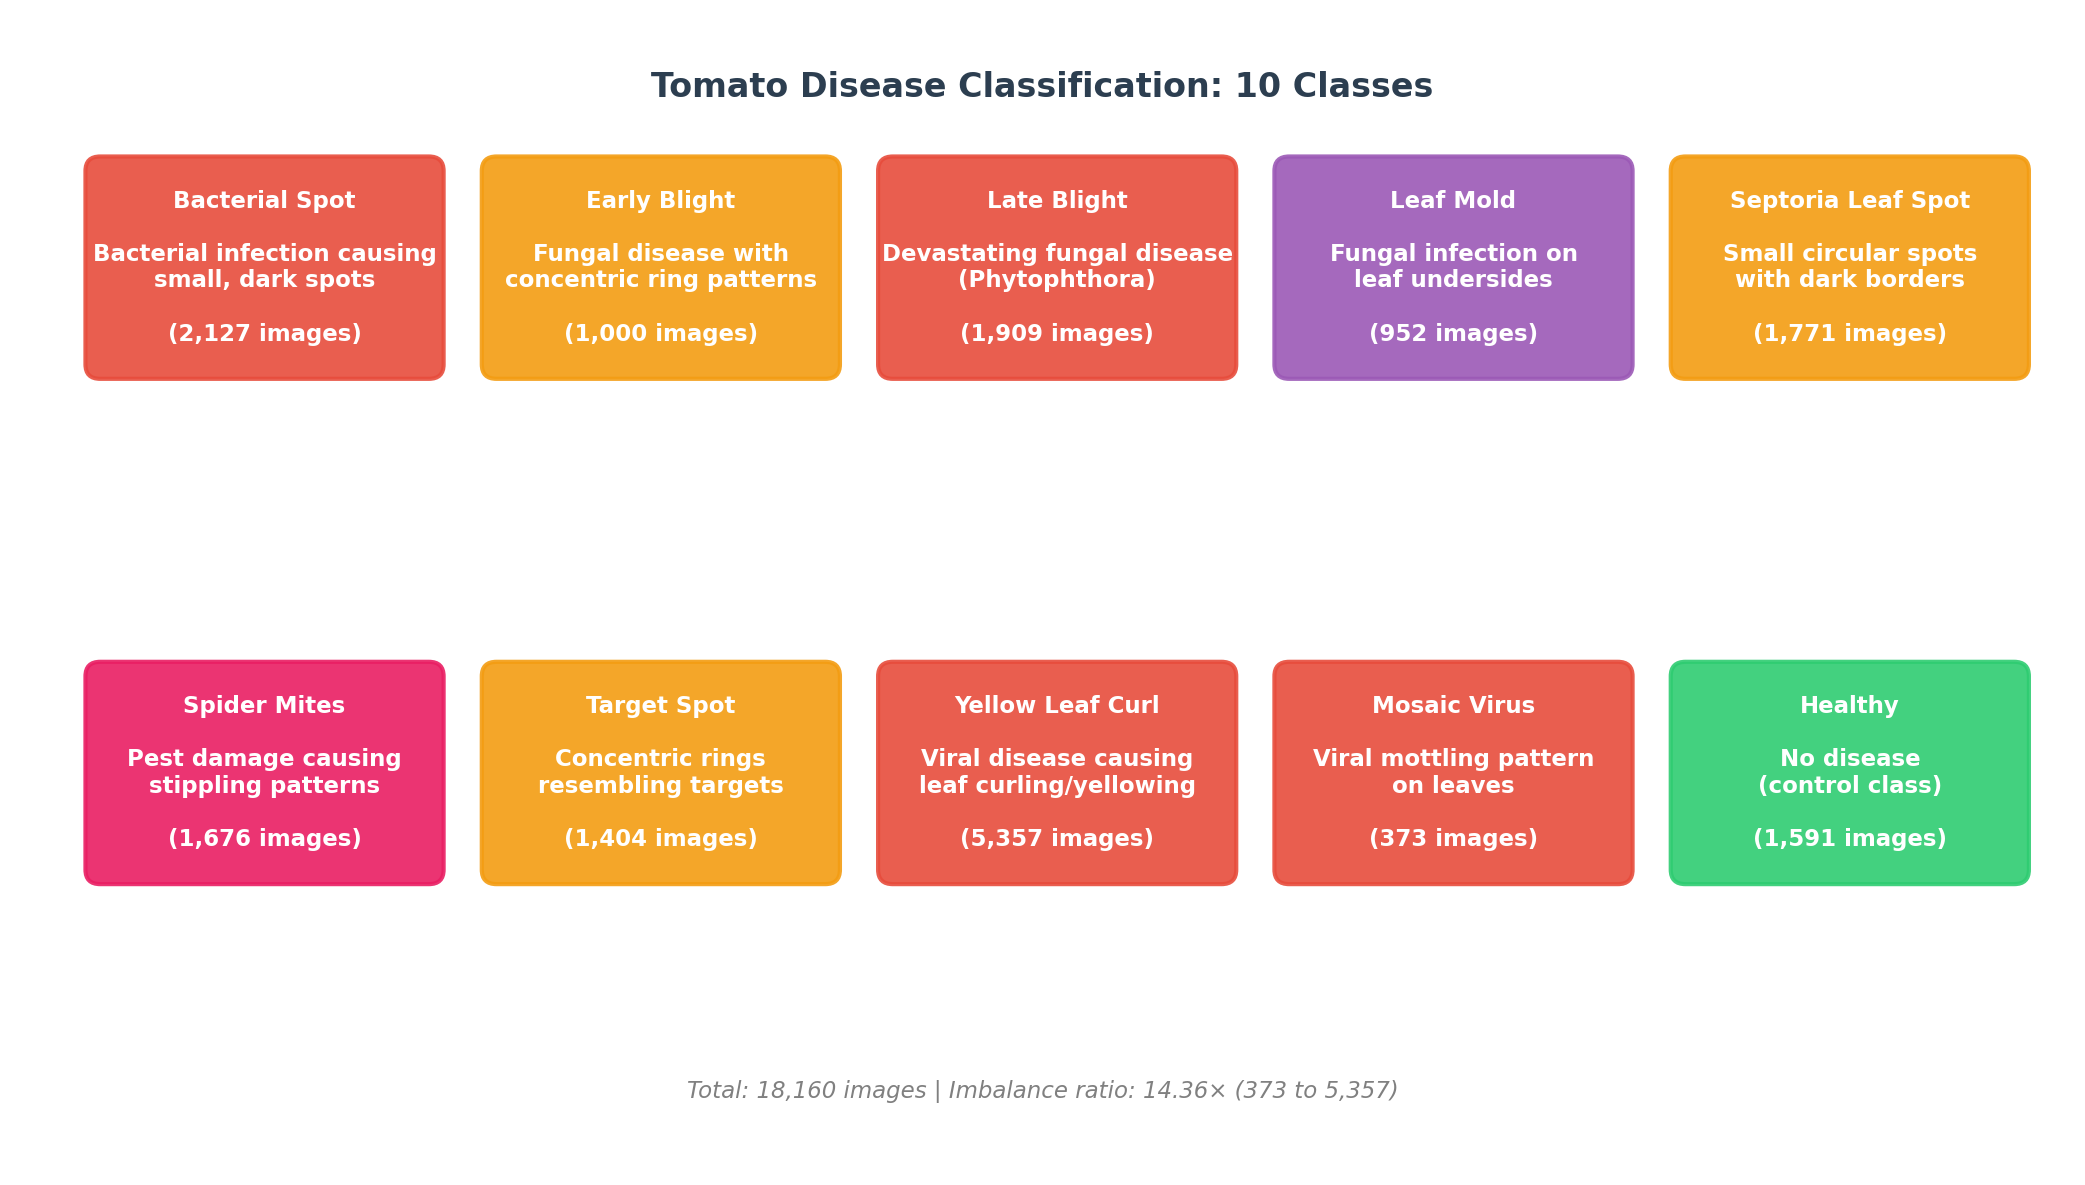

In [10]:
# =============================================================================
# DIAGRAM 8: DISEASE CLASSES OVERVIEW
# =============================================================================

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 14)
ax.set_ylim(0, 8)
ax.axis('off')

# Title
ax.text(7, 7.5, 'Tomato Disease Classification: 10 Classes', 
        ha='center', va='center', fontsize=16, fontweight='bold', color=COLORS['dark'])

# Disease classes with descriptions
diseases = [
    ('Bacterial Spot', '2,127', 'Bacterial infection causing\nsmall, dark spots', COLORS['accent']),
    ('Early Blight', '1,000', 'Fungal disease with\nconcentric ring patterns', COLORS['warning']),
    ('Late Blight', '1,909', 'Devastating fungal disease\n(Phytophthora)', COLORS['accent']),
    ('Leaf Mold', '952', 'Fungal infection on\nleaf undersides', COLORS['purple']),
    ('Septoria Leaf Spot', '1,771', 'Small circular spots\nwith dark borders', COLORS['warning']),
    ('Spider Mites', '1,676', 'Pest damage causing\nstippling patterns', COLORS['pink']),
    ('Target Spot', '1,404', 'Concentric rings\nresembling targets', COLORS['warning']),
    ('Yellow Leaf Curl', '5,357', 'Viral disease causing\nleaf curling/yellowing', COLORS['accent']),
    ('Mosaic Virus', '373', 'Viral mottling pattern\non leaves', COLORS['accent']),
    ('Healthy', '1,591', 'No disease\n(control class)', COLORS['secondary']),
]

# Draw boxes in grid
for i, (name, count, desc, color) in enumerate(diseases):
    row = i // 5
    col = i % 5
    x = 0.5 + col * 2.7
    y = 5.5 - row * 3.5
    
    draw_box(ax, x, y, 2.4, 1.5, 
             f'{name}\n\n{desc}\n\n({count} images)', 
             color, fontsize=11)

# Add summary
ax.text(7, 0.5, 'Total: 18,160 images | Imbalance ratio: 14.36× (373 to 5,357)', 
        ha='center', fontsize=11, style='italic', color='gray')

plt.tight_layout()

# Save
fig_path = OUTPUT_PATH / 'diagram_08_disease_classes.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Figure saved: {fig_path}")

plt.show()

---

## Summary

### 📁 Diagrams Generated

| # | Diagram | Description |
|---|---------|-------------|
| 1 | `diagram_01_project_workflow.png` | Complete 4-phase project workflow |
| 2 | `diagram_02_data_pipeline.png` | Data flow from raw to splits |
| 3 | `diagram_03_cae_architecture.png` | Encoder-Decoder architecture |
| 4 | `diagram_04_cnn_two_phase_training.png` | Frozen/Unfrozen training phases |
| 5 | `diagram_05_training_pipeline.png` | Complete training flow |
| 6 | `diagram_06_inference_pipeline.png` | Production inference flow |
| 7 | `diagram_07_performance_dashboard.png` | Metrics summary dashboard |
| 8 | `diagram_08_disease_classes.png` | 10 disease class overview |

In [11]:
# =============================================================================
# LIST ALL GENERATED DIAGRAMS
# =============================================================================

print("\n" + "="*60)
print("✓ WORKFLOW DIAGRAMS NOTEBOOK COMPLETE")
print("="*60)

print(f"\nDiagrams saved to: {OUTPUT_PATH}")
print("\nGenerated files:")

diagram_files = sorted(OUTPUT_PATH.glob('diagram_*.png'))
for f in diagram_files:
    print(f"  • {f.name}")

print(f"\nTotal diagrams: {len(diagram_files)}")
print(f"\nExecution finished at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✓ WORKFLOW DIAGRAMS NOTEBOOK COMPLETE

Diagrams saved to: /home/maliciit/ml-projects/python-projects/plant-village-cae/outputs

Generated files:
  • diagram_01_project_workflow.png
  • diagram_02_data_pipeline.png
  • diagram_03_cae_architecture.png
  • diagram_04_cnn_two_phase_training.png
  • diagram_05_training_pipeline.png
  • diagram_06_inference_pipeline.png
  • diagram_07_performance_dashboard.png
  • diagram_08_disease_classes.png

Total diagrams: 8

Execution finished at: 2026-01-28 12:14:56
